In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely as shp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
study_area = gpd.read_file('./output/json/study_area_data3.geojson')

In [3]:
study_area.shape

(20, 26)

In [4]:
study_area.head()

,Ward_Name,district,avg_household_size,pop_proj_2020,cases,cases_per100k,cases_count,informality_area,ward_area,informality_percentage,...,pop_density_km,schools_count,tt_ctc,tt_ctc_traffic,straightness,betweenness,underground_water_area,underground_water_percentage,groundwater_contamination_risk,geometry
0,Tandale,kinondoni,3.6,84711.0,5,47.0,40.0,1.124575e+06,1.158567e+06,97.066040,...,73117.0,13,5.353533,6.117001,0.719432,0.002819,1.158567e+06,100.000000,2.139994,"POLYGON ((527428.462 9248640.487, 527412.132 9..."
1,Hananasif,kinondoni,3.7,57393.0,2,11.0,6.0,4.550629e+05,1.824451e+06,24.942465,...,31458.0,5,8.710560,11.847985,0.719111,0.002409,7.608970e+05,41.705541,1.276426,"POLYGON ((529833.904 9248106.432, 529802.298 9..."
2,Sinza,kinondoni,4.1,62699.0,1,3.5,2.0,4.326442e+05,3.336752e+06,12.966029,...,18790.0,5,13.077327,16.480949,0.751052,0.001947,3.307818e+06,99.132867,1.017209,"POLYGON ((525504.568 9249536.487, 525498.864 9..."
3,Makumbusho,kinondoni,3.7,105296.0,2,11.0,12.0,1.227272e+06,1.736836e+06,70.661368,...,60625.0,23,3.401029,4.214983,0.713086,0.002513,1.735881e+06,99.945003,1.177628,"POLYGON ((528394.881 9248675.150, 528390.373 9..."
4,Mikocheni,kinondoni,4.0,50948.0,1,3.5,2.0,4.170024e+05,7.546862e+06,5.525507,...,6751.0,21,10.110283,14.138167,0.736496,0.003188,1.885965e+04,0.249901,1.000039,"POLYGON ((529152.308 9251689.819, 529165.638 9..."


In [8]:
import sklearn.neighbors as skn
import sklearn.metrics as skm
import sklearn.cluster as skc
import libpysal as lp

In [33]:
import matplotlib.patheffects as PathEffects

In [34]:
study_area['coords'] = study_area['geometry'].apply(lambda x: x.representative_point().coords[:])
study_area['coords'] = [coords[0] for coords in study_area['coords']]

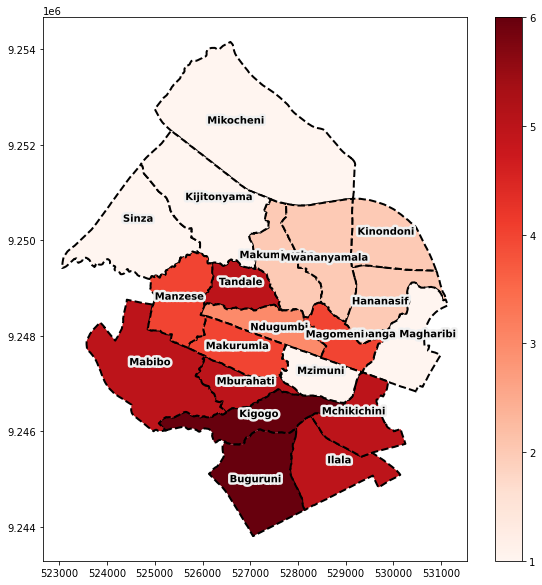

In [35]:
study_area.plot(column = 'cases', figsize = (10,10),
         cmap = 'Reds', edgecolor = 'k',legend = True, linewidth= 2, linestyle ='--')
for idx, row in study_area.iterrows():
    plt.annotate(text=row['Ward_Name'], xy=row['coords'], rotation=0,
                 horizontalalignment='center', fontsize=10, color = 'k', weight='bold',
                path_effects=[PathEffects.withStroke(linewidth=5, foreground="#f0f0f0")])

In [36]:
plt.rcParams['figure.facecolor'] = 'white'

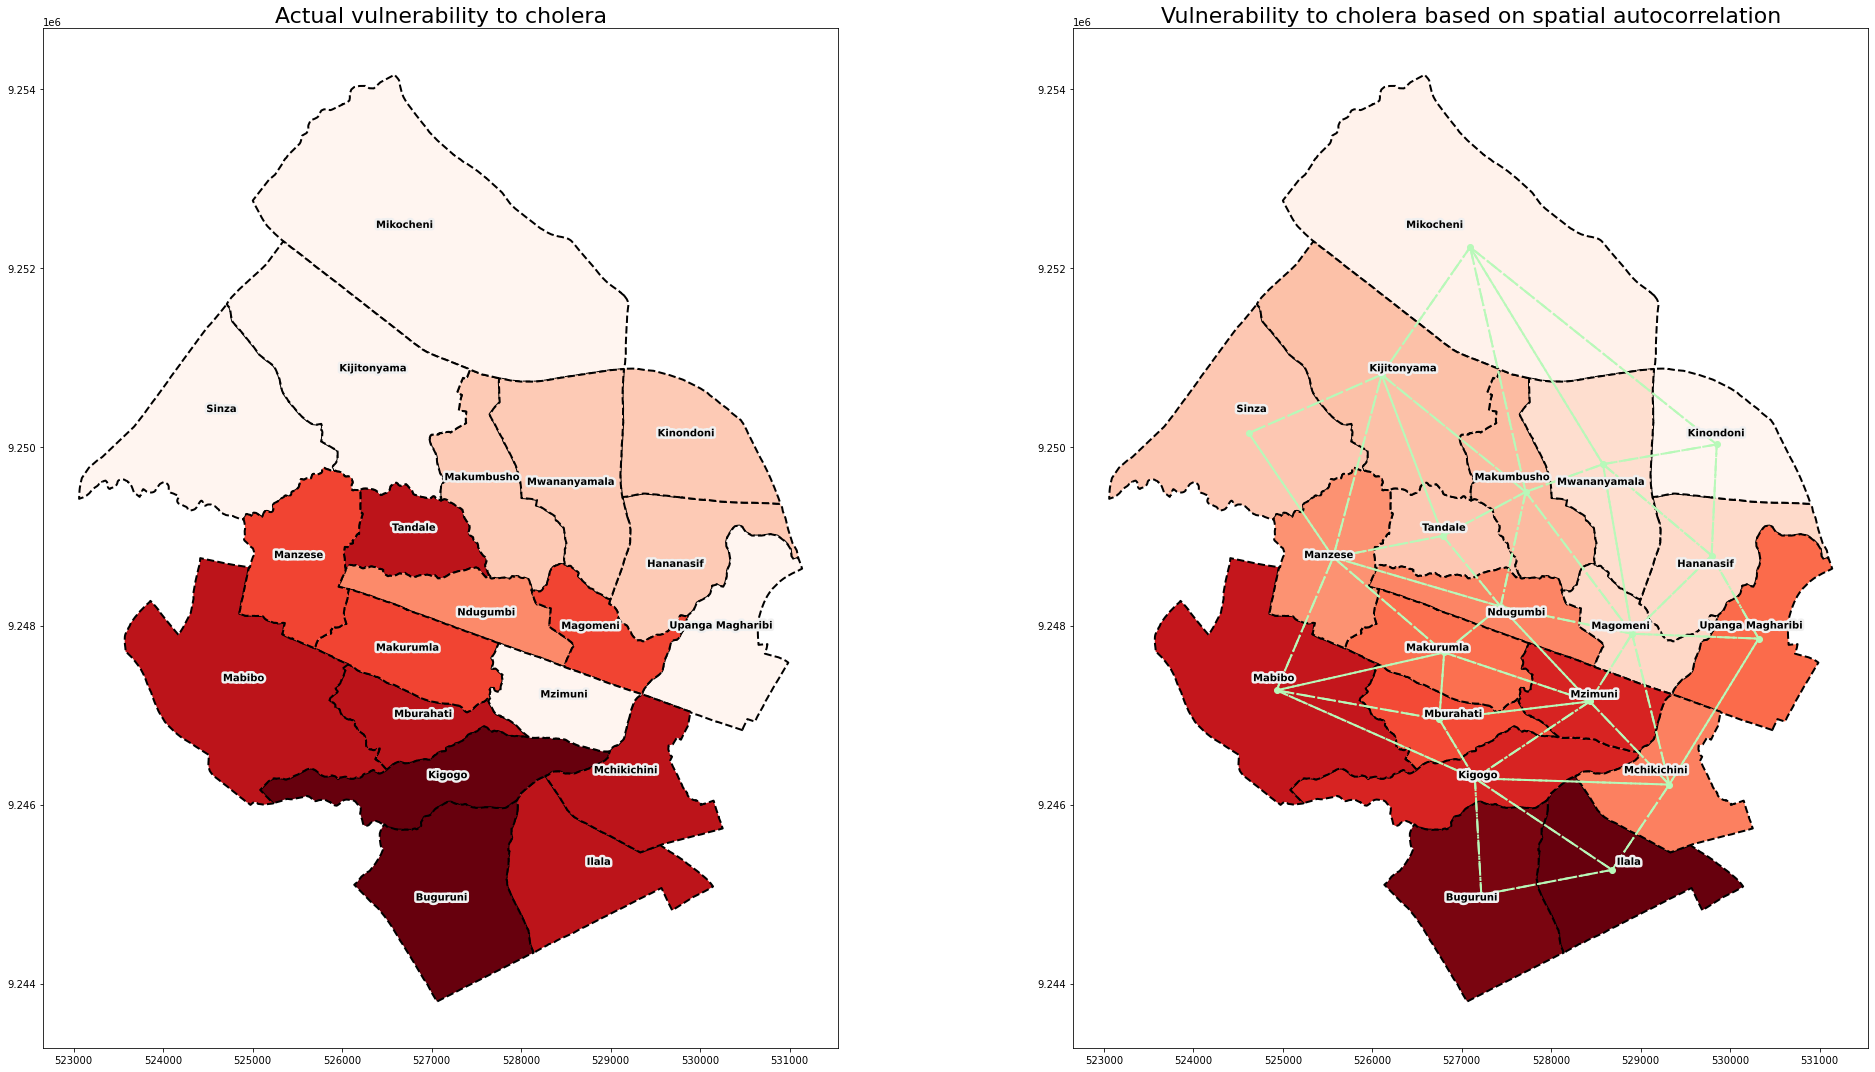

In [37]:
fig,ax = plt.subplots(1,2,figsize=(1.5*20,1.5*10))
study_area.plot(column = 'cases', ax=ax[0],
         cmap = 'Reds', edgecolor = 'k',legend = False, linewidth= 2, linestyle ='--')
study_area.assign(cl=caseslag).plot(column = 'cl', ax=ax[1],
         cmap = 'Reds', edgecolor = 'k',legend = False, linewidth= 2, linestyle ='--')
for idx, row in study_area.iterrows():
    ax[0].annotate(text=row['Ward_Name'], xy=row['coords'], rotation=0,
                 horizontalalignment='center', fontsize=10, color = 'k', weight='bold',
                path_effects=[PathEffects.withStroke(linewidth=5, foreground="#f0f0f0")])
    ax[1].annotate(text=row['Ward_Name'], xy=row['coords'], rotation=0,
                 horizontalalignment='center', fontsize=10, color = 'k', weight='bold',
                path_effects=[PathEffects.withStroke(linewidth=5, foreground="#f0f0f0")])
    
rook_graph.plot(study_area, ax=ax[1],color = '#B8F9B9', edge_kws={'linewidth':2, 'linestyle':'dashdot'})    

ax[0].set_title('Actual vulnerability to cholera', fontsize=22)
ax[1].set_title('Vulnerability to cholera based on spatial autocorrelation', fontsize=22)
plt.tight_layout()

In [38]:
study_area.head()

,Ward_Name,district,avg_household_size,pop_proj_2020,cases,cases_per100k,cases_count,informality_area,ward_area,informality_percentage,...,schools_count,tt_ctc,tt_ctc_traffic,straightness,betweenness,underground_water_area,underground_water_percentage,groundwater_contamination_risk,geometry,coords
0,Tandale,kinondoni,3.6,84711.0,5,47.0,40.0,1.124575e+06,1.158567e+06,97.066040,...,13,5.353533,6.117001,0.719432,0.002819,1.158567e+06,100.000000,2.139994,"POLYGON ((527428.462 9248640.487, 527412.132 9...","(526803.3179271126, 9249061.293078065)"
1,Hananasif,kinondoni,3.7,57393.0,2,11.0,6.0,4.550629e+05,1.824451e+06,24.942465,...,5,8.710560,11.847985,0.719111,0.002409,7.608970e+05,41.705541,1.276426,"POLYGON ((529833.904 9248106.432, 529802.298 9...","(529724.975637357, 9248656.847572092)"
2,Sinza,kinondoni,4.1,62699.0,1,3.5,2.0,4.326442e+05,3.336752e+06,12.966029,...,5,13.077327,16.480949,0.751052,0.001947,3.307818e+06,99.132867,1.017209,"POLYGON ((525504.568 9249536.487, 525498.864 9...","(524651.5473684139, 9250388.59462506)"
3,Makumbusho,kinondoni,3.7,105296.0,2,11.0,12.0,1.227272e+06,1.736836e+06,70.661368,...,23,3.401029,4.214983,0.713086,0.002513,1.735881e+06,99.945003,1.177628,"POLYGON ((528394.881 9248675.150, 528390.373 9...","(527563.0614273051, 9249626.458094079)"
4,Mikocheni,kinondoni,4.0,50948.0,1,3.5,2.0,4.170024e+05,7.546862e+06,5.525507,...,21,10.110283,14.138167,0.736496,0.003188,1.885965e+04,0.249901,1.000039,"POLYGON ((529152.308 9251689.819, 529165.638 9...","(526696.7740605372, 9252446.106550751)"


In [42]:
study_area = gpd.read_file('./output/json/study_area_data6.geojson')

In [43]:
study_area.columns

Index(['Ward_Name', 'district', 'avg_household_size', 'pop_proj_2020', 'cases',
       'cases_per100k', 'cases_count', 'informality_area', 'ward_area',
       'informality_percentage', 'builtup_area', 'builtup_area_percentage',
       'covered_area_water', 'cover_percent_water', 'covered_area_sewer',
       'cover_percent_sewer', 'pop_density_km', 'schools_count', 'tt_ctc',
       'tt_ctc_traffic', 'straightness', 'betweenness',
       'underground_water_area', 'underground_water_percentage',
       'groundwater_contamination_risk', 'percent_btup_50m_fromwater',
       'percent_btup_50_100m_fromwater', 'percent_btup_100_200m_fromwater',
       'exposure_to_water_resivoir', 'no_markets', 'major_bus_stations',
       'activites_impact_weight', 'no_bus_stands', 'human_mobility',
       'impact_of_human_activities', 'no_hospitals', 'geometry'],
      dtype='object')

In [44]:
contamination_risk_fixed = gpd.read_file('./output/json/study_area_data3.geojson')

In [45]:
contamination_risk_fixed.columns

Index(['Ward_Name', 'district', 'avg_household_size', 'pop_proj_2020', 'cases',
       'cases_per100k', 'cases_count', 'informality_area', 'ward_area',
       'informality_percentage', 'builtup_area', 'builtup_area_percentage',
       'covered_area_water', 'cover_percent_water', 'covered_area_sewer',
       'cover_percent_sewer', 'pop_density_km', 'schools_count', 'tt_ctc',
       'tt_ctc_traffic', 'straightness', 'betweenness',
       'underground_water_area', 'underground_water_percentage',
       'groundwater_contamination_risk', 'geometry'],
      dtype='object')

In [46]:
study_area.Ward_Name == contamination_risk_fixed.Ward_Name

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: Ward_Name, dtype: bool

In [47]:
study_area.groundwater_contamination_risk = contamination_risk_fixed.groundwater_contamination_risk

In [48]:
study_area.head()

,Ward_Name,district,avg_household_size,pop_proj_2020,cases,cases_per100k,cases_count,informality_area,ward_area,informality_percentage,...,percent_btup_100_200m_fromwater,exposure_to_water_resivoir,no_markets,major_bus_stations,activites_impact_weight,no_bus_stands,human_mobility,impact_of_human_activities,no_hospitals,geometry
0,Tandale,kinondoni,3.6,84711.0,5,47.0,40.0,1.124575e+06,1.158567e+06,97.066040,...,19.724812,8.1,2,1,2,0.0,2.000000,4,12,"POLYGON ((527428.462 9248640.487, 527412.132 9..."
1,Hananasif,kinondoni,3.7,57393.0,2,11.0,6.0,4.550629e+05,1.824451e+06,24.942465,...,26.865902,3.1,2,1,0,7.0,5.294118,2,4,"POLYGON ((529833.904 9248106.432, 529802.298 9..."
2,Sinza,kinondoni,4.1,62699.0,1,3.5,2.0,4.326442e+05,3.336752e+06,12.966029,...,36.474482,6.4,1,0,0,7.0,2.647059,1,11,"POLYGON ((525504.568 9249536.487, 525498.864 9..."
3,Makumbusho,kinondoni,3.7,105296.0,2,11.0,12.0,1.227272e+06,1.736836e+06,70.661368,...,32.215628,4.6,2,0,3,7.0,2.647059,5,7,"POLYGON ((528394.881 9248675.150, 528390.373 9..."
4,Mikocheni,kinondoni,4.0,50948.0,1,3.5,2.0,4.170024e+05,7.546862e+06,5.525507,...,33.521898,4.8,1,1,3,10.0,6.705882,4,6,"POLYGON ((529152.308 9251689.819, 529165.638 9..."


In [49]:
study_area.tt_ctc

0      5.353533
1      8.710560
2     13.077327
3      3.401029
4     10.110283
5      4.038297
6      4.450877
7      8.935477
8      5.054134
9      2.563610
10     7.173050
11     8.915846
12    11.992533
13    10.141556
14     4.705670
15     8.231088
16     6.007399
17     4.361152
18     6.355069
19     4.397670
Name: tt_ctc, dtype: float64

In [50]:
study_area.tt_ctc_traffic

0      6.117001
1     11.847985
2     16.480949
3      4.214983
4     14.138167
5      4.714075
6      4.652718
7     11.709024
8      5.139383
9      2.593698
10     7.881723
11    12.310143
12    16.578736
13    10.581962
14     5.473948
15    10.337736
16     6.953265
17     5.338335
18     7.401176
19     4.634758
Name: tt_ctc_traffic, dtype: float64

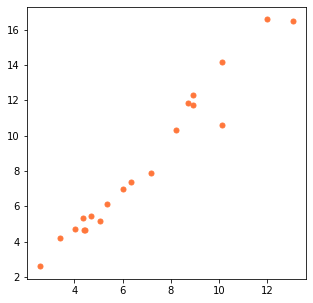

In [51]:
fig, ax = plt.subplots(figsize = (5,5))
plt.plot(study_area.tt_ctc,study_area.tt_ctc_traffic,'.', color ='#FF773B',marker='o',markersize=5)

In [52]:
import mapclassify as mc

In [60]:
study_area.to_crs(epsg = 4326, inplace = True)

In [61]:
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

In [62]:
pd.options.display.max_columns = None

In [64]:
study_area.head()

,Ward_Name,district,avg_household_size,pop_proj_2020,cases,cases_per100k,cases_count,informality_area,ward_area,informality_percentage,builtup_area,builtup_area_percentage,covered_area_water,cover_percent_water,covered_area_sewer,cover_percent_sewer,pop_density_km,schools_count,tt_ctc,tt_ctc_traffic,straightness,betweenness,underground_water_area,underground_water_percentage,groundwater_contamination_risk,percent_btup_50m_fromwater,percent_btup_50_100m_fromwater,percent_btup_100_200m_fromwater,exposure_to_water_resivoir,no_markets,major_bus_stations,activites_impact_weight,no_bus_stands,human_mobility,impact_of_human_activities,no_hospitals,geometry
0,Tandale,kinondoni,3.6,84711.0,5,47.0,40.0,1.124575e+06,1.158567e+06,97.066040,5.823748e+05,50.266815,5.619050e+05,48.499996,0.000000e+00,0.000000,73117.0,13,5.353533,6.117001,0.719432,0.002819,1.158567e+06,100.000000,2.139994,49.249958,31.025230,19.724812,8.1,2,1,2,0.0,2.000000,4,12,"POLYGON ((39.24823 -6.79740, 39.24808 -6.79745..."
1,Hananasif,kinondoni,3.7,57393.0,2,11.0,6.0,4.550629e+05,1.824451e+06,24.942465,5.299215e+05,29.045541,7.642899e+05,41.891512,8.357485e+04,4.580823,31458.0,5,8.710560,11.847985,0.719111,0.002409,7.608970e+05,41.705541,1.276426,7.218407,14.620539,26.865902,3.1,2,1,0,7.0,5.294118,2,4,"POLYGON ((39.27000 -6.80222, 39.26971 -6.80216..."
2,Sinza,kinondoni,4.1,62699.0,1,3.5,2.0,4.326442e+05,3.336752e+06,12.966029,1.104055e+06,33.087728,1.720358e+06,51.557864,1.572765e+05,4.713461,18790.0,5,13.077327,16.480949,0.751052,0.001947,3.307818e+06,99.132867,1.017209,25.255836,28.629253,36.474482,6.4,1,0,0,7.0,2.647059,1,11,"POLYGON ((39.23081 -6.78931, 39.23076 -6.78935..."
3,Makumbusho,kinondoni,3.7,105296.0,2,11.0,12.0,1.227272e+06,1.736836e+06,70.661368,7.972053e+05,45.899848,6.506823e+05,37.463647,1.348648e+04,0.776497,60625.0,23,3.401029,4.214983,0.713086,0.002513,1.735881e+06,99.945003,1.177628,18.170366,16.959317,32.215628,4.6,2,0,3,7.0,2.647059,5,7,"POLYGON ((39.25697 -6.79708, 39.25693 -6.79709..."
4,Mikocheni,kinondoni,4.0,50948.0,1,3.5,2.0,4.170024e+05,7.546862e+06,5.525507,1.767289e+06,23.417539,3.892613e+06,51.579224,2.117533e+06,28.058457,6751.0,21,10.110283,14.138167,0.736496,0.003188,1.885965e+04,0.249901,1.000039,19.315610,17.250207,33.521898,4.8,1,1,3,10.0,6.705882,4,6,"POLYGON ((39.26381 -6.76981, 39.26393 -6.76998..."


In [65]:
model_data = study_area[['Ward_Name','cases','informality_percentage','pop_density_km','groundwater_contamination_risk',
                        'exposure_to_water_resivoir','human_mobility','impact_of_human_activities','no_hospitals','tt_ctc_traffic','geometry']]

In [66]:
model_data.head()

,Ward_Name,cases,informality_percentage,pop_density_km,groundwater_contamination_risk,exposure_to_water_resivoir,human_mobility,impact_of_human_activities,no_hospitals,tt_ctc_traffic,geometry
0,Tandale,5,97.066040,73117.0,2.139994,8.1,2.000000,4,12,6.117001,"POLYGON ((39.24823 -6.79740, 39.24808 -6.79745..."
1,Hananasif,2,24.942465,31458.0,1.276426,3.1,5.294118,2,4,11.847985,"POLYGON ((39.27000 -6.80222, 39.26971 -6.80216..."
2,Sinza,1,12.966029,18790.0,1.017209,6.4,2.647059,1,11,16.480949,"POLYGON ((39.23081 -6.78931, 39.23076 -6.78935..."
3,Makumbusho,2,70.661368,60625.0,1.177628,4.6,2.647059,5,7,4.214983,"POLYGON ((39.25697 -6.79708, 39.25693 -6.79709..."
4,Mikocheni,1,5.525507,6751.0,1.000039,4.8,6.705882,4,6,14.138167,"POLYGON ((39.26381 -6.76981, 39.26393 -6.76998..."


In [67]:
n_y = model_data['cases'].values.reshape(-1,1)
n_x =  model_data[['informality_percentage','pop_density_km','groundwater_contamination_risk',
                        'exposure_to_water_resivoir','human_mobility','impact_of_human_activities','tt_ctc_traffic']].values

In [68]:
n_x = (n_x - n_x.mean(axis = 0))/n_x.std(axis = 0)
n_y = (n_y - n_y.mean(axis = 0))/n_y.std(axis = 0)

In [82]:
export_model_data = pd.DataFrame(n_x)

In [83]:
export_model_data.columns = ['informality_percentage','pop_density_km','groundwater_contamination_risk',
                        'exposure_to_water_resivoir','human_mobility','impact_of_human_activities','tt_ctc_traffic']

In [84]:
export_model_data.index = model_data.Ward_Name

In [85]:
export_model_data.head()

,informality_percentage,pop_density_km,groundwater_contamination_risk,exposure_to_water_resivoir,human_mobility,impact_of_human_activities,tt_ctc_traffic
Ward_Name,,,,,,,
Tandale,1.403309,2.093899,0.143478,1.242362,-0.910525,0.559233,-0.565489
Hananasif,-0.629911,-0.238646,-0.275983,-0.877710,0.710759,-0.683507,0.820664
Sinza,-0.967536,-0.947945,-0.401892,0.521538,-0.592058,-1.304877,1.941239
Makumbusho,0.658940,1.394454,-0.323972,-0.241688,-0.592058,1.180603,-1.025530
Mikocheni,-1.177290,-1.622026,-0.410232,-0.156885,1.405596,0.559233,1.374590


In [86]:
export_model_data.to_csv('output/xls/model_data.csv')

In [69]:
coords = list(zip(model_data.centroid.x,model_data.centroid.y))

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [70]:
gwr_selector = Sel_BW(coords, n_y, n_x,constant=False, kernel = 'gaussian')
gwr_bw = gwr_selector.search(bw_min=3)
print(gwr_bw)

18.0


In [71]:
model = GWR(coords, n_y, n_x,gwr_bw, kernel = 'bisquare')
gwr_results = GWR(coords, n_y, n_x,gwr_bw).fit()
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                  20
Number of covariates:                                                     8

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              6.982
Log-likelihood:                                                     -17.855
AIC:                                                                 51.710
AICc:                                                                71.710
BIC:                                                                -28.967
R2:                                                                   0.651
Adj. R2:                                                              0.447

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [72]:
filtered = gwr_results.filter_tvals(alpha = 1)

In [73]:
filtered

array([[-1.51822967,  1.76549156, -1.18986279,  1.67325727,  2.44009088,
         0.77422656,  1.95369428, -0.3641148 ],
       [-1.01817703, -0.01997781, -0.40491064,  2.78415827,  2.16947035,
         0.19930801,  1.87884192, -1.07528889],
       [-1.89585226,  1.57461185, -1.09953586,  1.32211494,  2.28309231,
         0.22228817,  1.31906961, -0.7936451 ],
       [-2.01977762,  0.43466688,  0.53545954,  1.34041574,  1.44665285,
         0.69341959,  0.71487456,  0.4153699 ],
       [-2.55331844,  0.97323722,  0.7357361 ,  0.75618162,  0.92024243,
         0.85304322,  0.52823512,  0.31703021],
       [-0.20234802,  1.30017928, -1.21553605,  1.5829523 ,  2.68202779,
         0.72932035,  1.97137998,  0.48677991],
       [ 0.73499889,  1.33132291, -0.91917264,  2.63664514, -0.11972607,
        -0.8082112 ,  3.2861326 , -2.76408149],
       [-2.20220592,  1.49185139, -0.240764  ,  1.07635228,  1.67390002,
         0.58632586,  0.90104867, -0.28396135],
       [ 1.23530589,  2.24332792

In [74]:
filtered.T

array([[-1.51822967, -1.01817703, -1.89585226, -2.01977762, -2.55331844,
        -0.20234802,  0.73499889, -2.20220592,  1.23530589,  0.1156941 ,
         1.42109423, -1.65828159, -0.667889  ,  0.73336577,  0.22912161,
        -0.69107783,  0.12204314, -2.02276856, -1.60100349,  1.44074345],
       [ 1.76549156, -0.01997781,  1.57461185,  0.43466688,  0.97323722,
         1.30017928,  1.33132291,  1.49185139,  2.24332792,  2.47452324,
         1.87925309,  0.21917755, -0.24395805,  2.49272953,  0.83828245,
        -0.07578973,  0.8262933 ,  0.39715212,  1.68494327,  1.76589418],
       [-1.18986279, -0.40491064, -1.09953586,  0.53545954,  0.7357361 ,
        -1.21553605, -0.91917264, -0.240764  , -1.90125685, -2.2274118 ,
        -1.47421918,  0.16267326, -0.54819313, -2.18175627, -0.77767193,
        -0.56154911, -0.97440504,  0.42081089, -1.59087195, -1.1144256 ],
       [ 1.67325727,  2.78415827,  1.32211494,  1.34041574,  0.75618162,
         1.5829523 ,  2.63664514,  1.07635228,  

In [75]:
gwr_results.localR2[0][0]

0.8637969573570979

In [76]:
gwr_results.adj_R2

0.6498243569459752

In [77]:
gwr_results.localR2

array([[0.86379696],
       [0.81612957],
       [0.92226991],
       [0.82476648],
       [0.88020467],
       [0.800378  ],
       [0.87254112],
       [0.90358516],
       [0.81672394],
       [0.811331  ],
       [0.84139652],
       [0.80138371],
       [0.85940741],
       [0.88874624],
       [0.87493235],
       [0.84133982],
       [0.85828213],
       [0.81684022],
       [0.90259376],
       [0.85022652]])

In [78]:
plt.rcParams['figure.facecolor'] = 'white'

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas

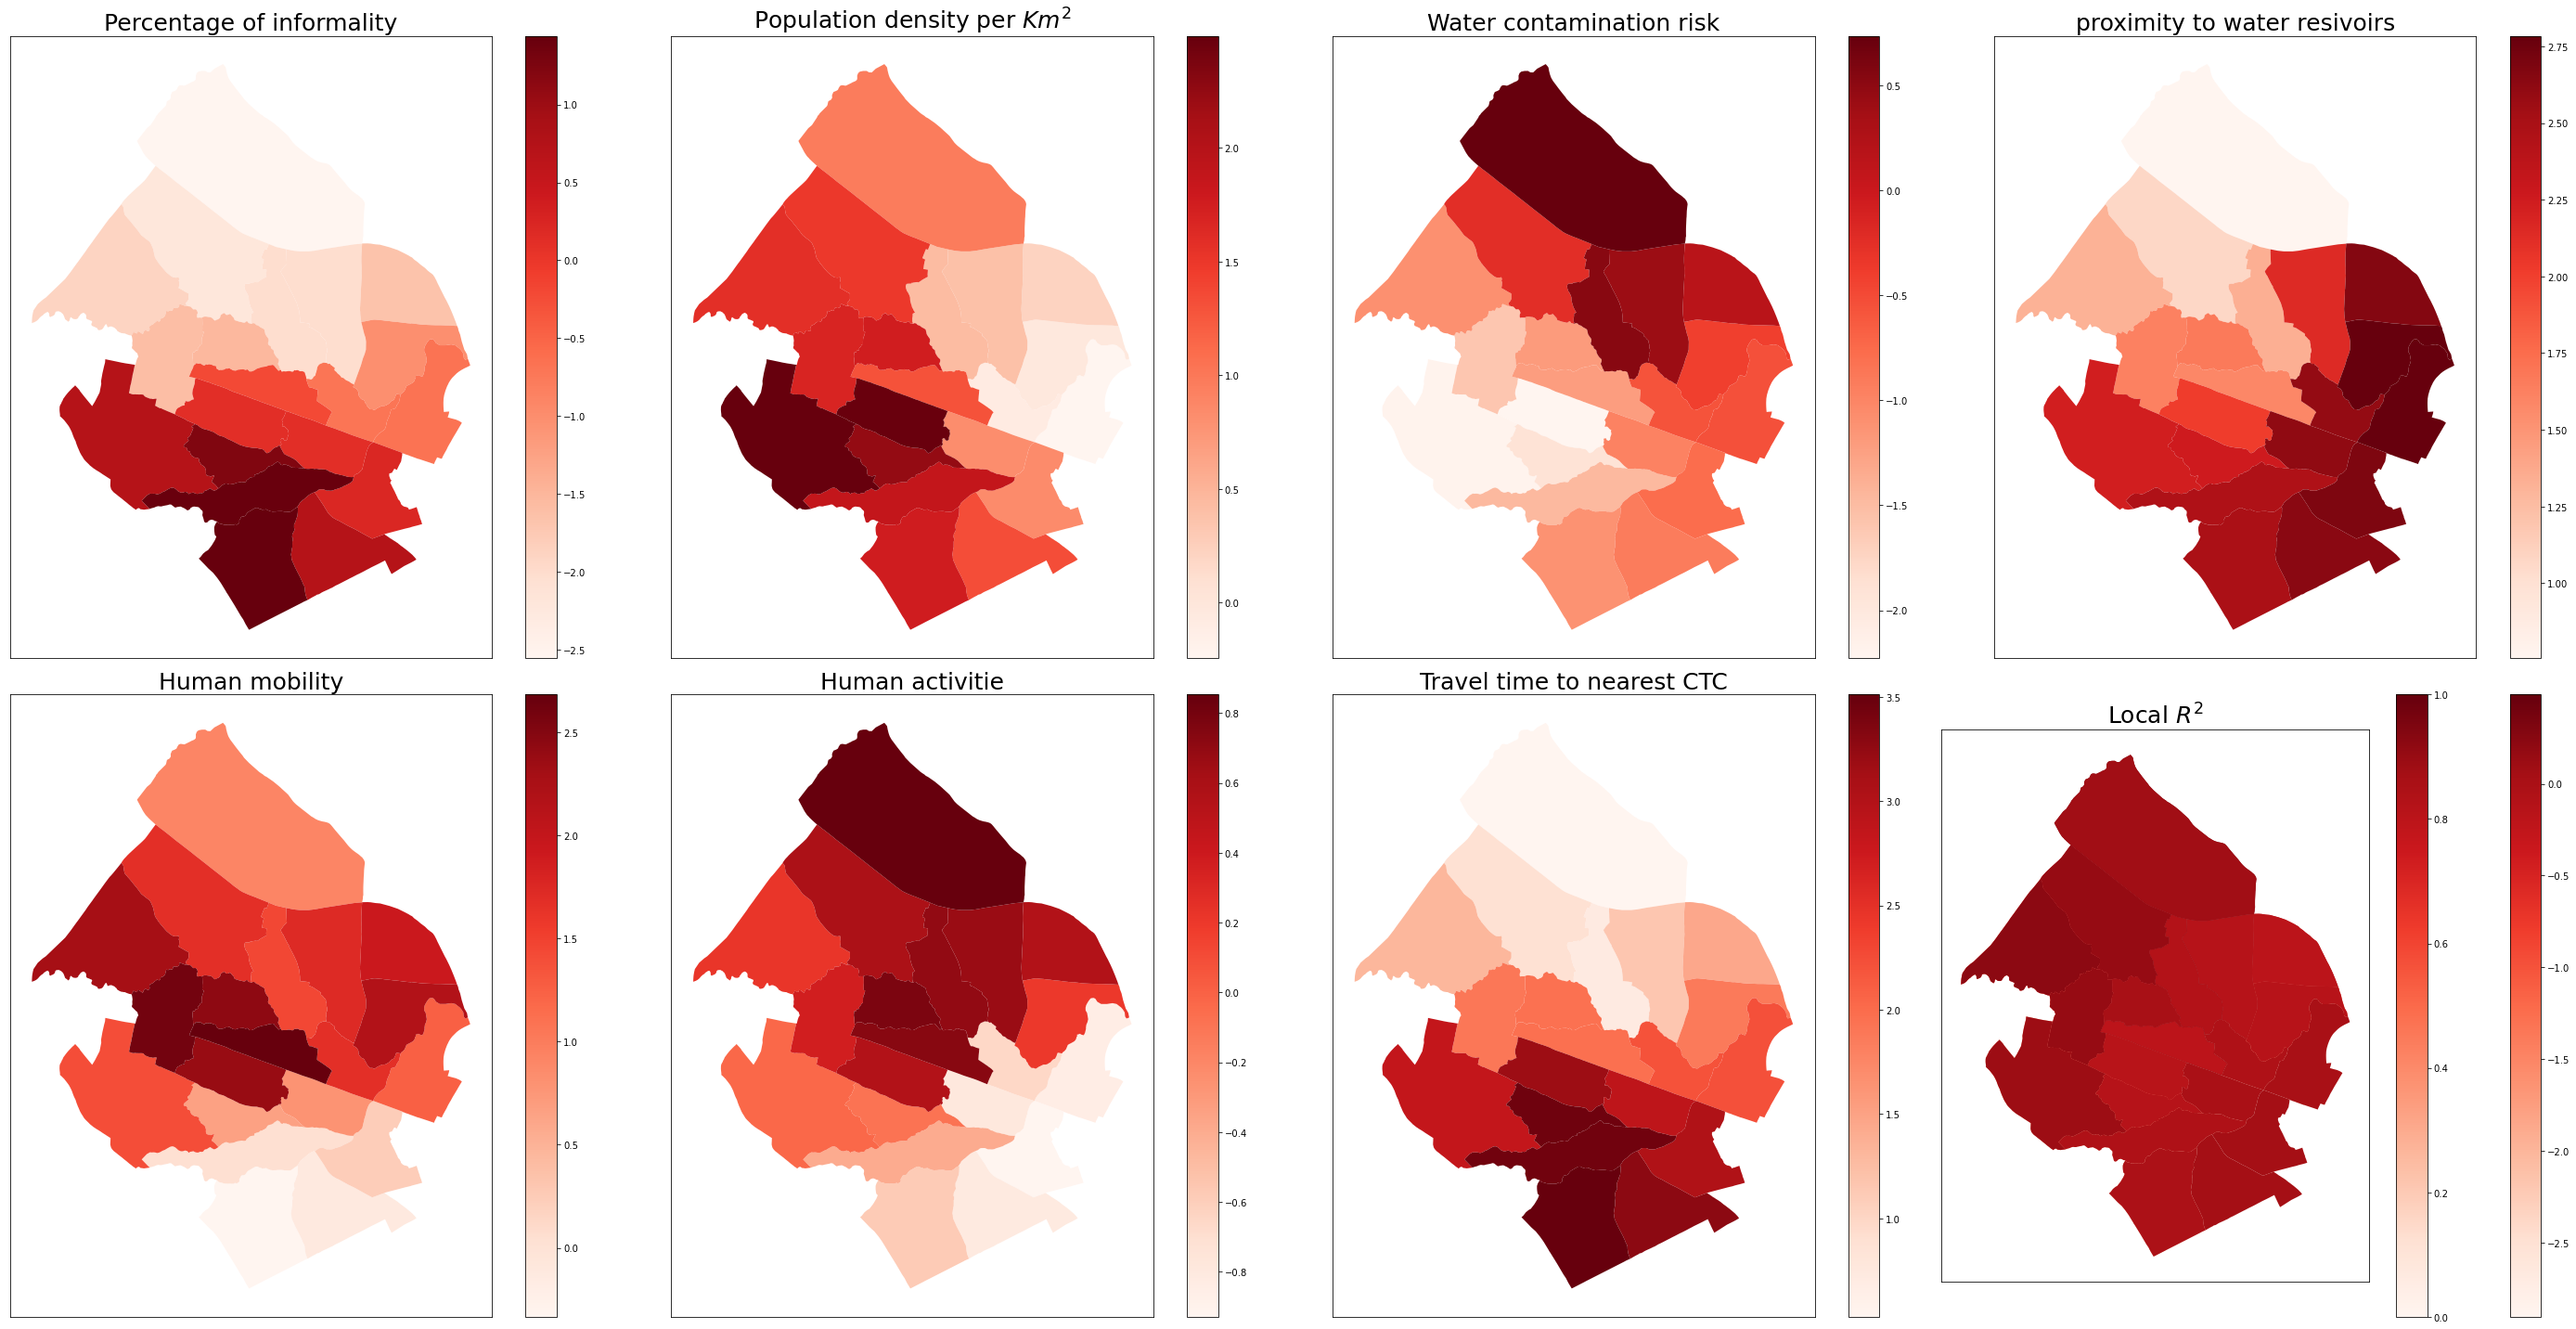

In [79]:
fig, ax = plt.subplots(2,4,figsize = (2*20,2*10), subplot_kw = {'aspect':'equal'})

ax = ax.flatten()
for i,row in enumerate(filtered.T):
    list_temp = model_data.assign(toplot = filtered.T[i])
    list_temp.query('toplot == 0').sort_values('toplot').plot(color = 'grey',
                                                              marker = '.',
                                                              ax = ax[i],
                                                              alpha = 0.2)
    list_temp.query('toplot!= 0').sort_values('toplot').plot(column = 'toplot', cmap = 'Reds',marker = '.',
                                                              ax = ax[i],
                                                              legend = True)
    ax[i].set_title(['Percentage of informality','Population density per $Km^2$','Water contamination risk',
                     'proximity to water resivoirs','Human mobility','Human activitie','Travel time to nearest CTC',
                     ''][i], fontsize = 25)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

model_data.assign(r2 = gwr_results.localR2).sort_values('r2').plot(column = 'r2',ax = ax[-1],marker = '.', cmap = 'Reds',
                                                           legend = True, vmin = 0 , vmax = 1)
ax[-1].set_xticklabels([])
ax[-1].set_yticklabels([])
ax[-1].set_xticks([])
ax[-1].set_yticks([])
ax[-1].set_title('Local $R^2$', fontsize = 25)

fig.tight_layout()
plt.show()

In [80]:
#take 2

In [81]:
model_data = study_area[['Ward_Name','cases','informality_percentage','pop_density_km','groundwater_contamination_risk',
                        'exposure_to_water_resivoir','human_mobility','impact_of_human_activities','no_hospitals','tt_ctc_traffic','geometry']]

In [82]:
n_y = model_data['cases'].values.reshape(-1,1)
n_x =  model_data[['informality_percentage','pop_density_km','groundwater_contamination_risk',
                        'exposure_to_water_resivoir','human_mobility','impact_of_human_activities','tt_ctc_traffic']].values

In [83]:
#mod2.exposure_to_water_resivoir = np.log(mod2.exposure_to_water_resivoir)
#mod2.informality_percentage = mod2.informality_percentage + 0.1
#mod2.informality_percentage = np.log(mod2.informality_percentage)
#mod2.pop_density_km = np.log(mod2.pop_density_km)

In [84]:
mod2 = model_data.copy()

mod2.groundwater_contamination_risk = np.log(mod2.groundwater_contamination_risk)
mod2.exposure_to_water_resivoir = np.log(mod2.exposure_to_water_resivoir)
mod2.human_mobility = np.log(mod2.human_mobility)
mod2.impact_of_human_activities = mod2.impact_of_human_activities + 0.1
mod2.impact_of_human_activities = np.log(mod2.impact_of_human_activities)
mod2.informality_percentage = mod2.informality_percentage + 0.1
mod2.informality_percentage = np.log(mod2.informality_percentage)
mod2.impact_of_human_activities = mod2.impact_of_human_activities + 0.1
mod2.pop_density_km = np.log(mod2.pop_density_km)
mod2.tt_ctc_traffic = np.log(mod2.tt_ctc_traffic)

#not_working

In [85]:
mod2.groundwater_contamination_risk = np.log(mod2.groundwater_contamination_risk)
mod2.human_mobility = np.log(mod2.human_mobility)
#worked

In [86]:
n_y = model_data['cases'].values.reshape(-1,1)
n_x =  mod2[['pop_density_km','groundwater_contamination_risk','human_mobility',
             'impact_of_human_activities','tt_ctc_traffic']].values

In [87]:
n_x = (n_x - n_x.mean(axis = 0))/n_x.std(axis = 0)
n_y = (n_y - n_y.mean(axis = 0))/n_y.std(axis = 0)

In [88]:
coords = list(zip(model_data.centroid.x,model_data.centroid.y))

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [89]:
gwr_selector = Sel_BW(coords, n_y, n_x,constant=False, kernel = 'gaussian')
gwr_bw = gwr_selector.search(bw_min=3)
print(gwr_bw)

18.0


In [90]:
model = GWR(coords, n_y, n_x,gwr_bw, kernel = 'bisquare')
gwr_results = GWR(coords, n_y, n_x,gwr_bw).fit()
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                  20
Number of covariates:                                                     6

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              7.504
Log-likelihood:                                                     -18.576
AIC:                                                                 49.151
AICc:                                                                60.485
BIC:                                                                -34.436
R2:                                                                   0.625
Adj. R2:                                                              0.491

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [91]:
filtered = gwr_results.filter_tvals(alpha = 0.5)

In [92]:
filtered

array([[-1.24814408,  0.        ,  1.86762691, -1.64164502,  0.        ,
         0.        ],
       [-1.12687283, -1.05448097,  3.82376022, -0.91519495,  1.74301955,
        -2.09763722],
       [-0.76962842, -0.71444953,  2.04699405, -2.83813448,  0.78076642,
        -1.59132005],
       [-2.02011387,  0.        ,  1.68270917,  0.        ,  0.        ,
         0.        ],
       [-2.03071584,  0.        ,  1.55861557, -0.71070366,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  2.11267598, -1.27372895,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  2.48143491, -1.79155163,  3.04692864,
        -3.16292293],
       [-1.40349464,  0.        ,  1.78030047, -1.95527811,  0.        ,
        -1.14062397],
       [ 1.64378394, -0.9933806 ,  2.04951599, -1.94997718,  2.83530525,
        -0.96361737],
       [ 1.0734764 ,  0.        ,  2.02305459, -1.90074136,  1.62563383,
         0.        ],
       [ 1.39345223, -0.80397182,  2.2340046 , -1.

In [93]:
print(gwr_results.localR2[0][0])
print(gwr_results.adj_R2)
print(gwr_results.localR2)

0.7905363181786299
0.6646836168022281
[[0.79053632]
 [0.80241077]
 [0.86391492]
 [0.75387078]
 [0.83698481]
 [0.73581823]
 [0.79775648]
 [0.85211261]
 [0.69418376]
 [0.7178078 ]
 [0.72969787]
 [0.77792625]
 [0.84323341]
 [0.77466689]
 [0.82595187]
 [0.81971594]
 [0.81289726]
 [0.77464838]
 [0.82734155]
 [0.72304959]]


C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


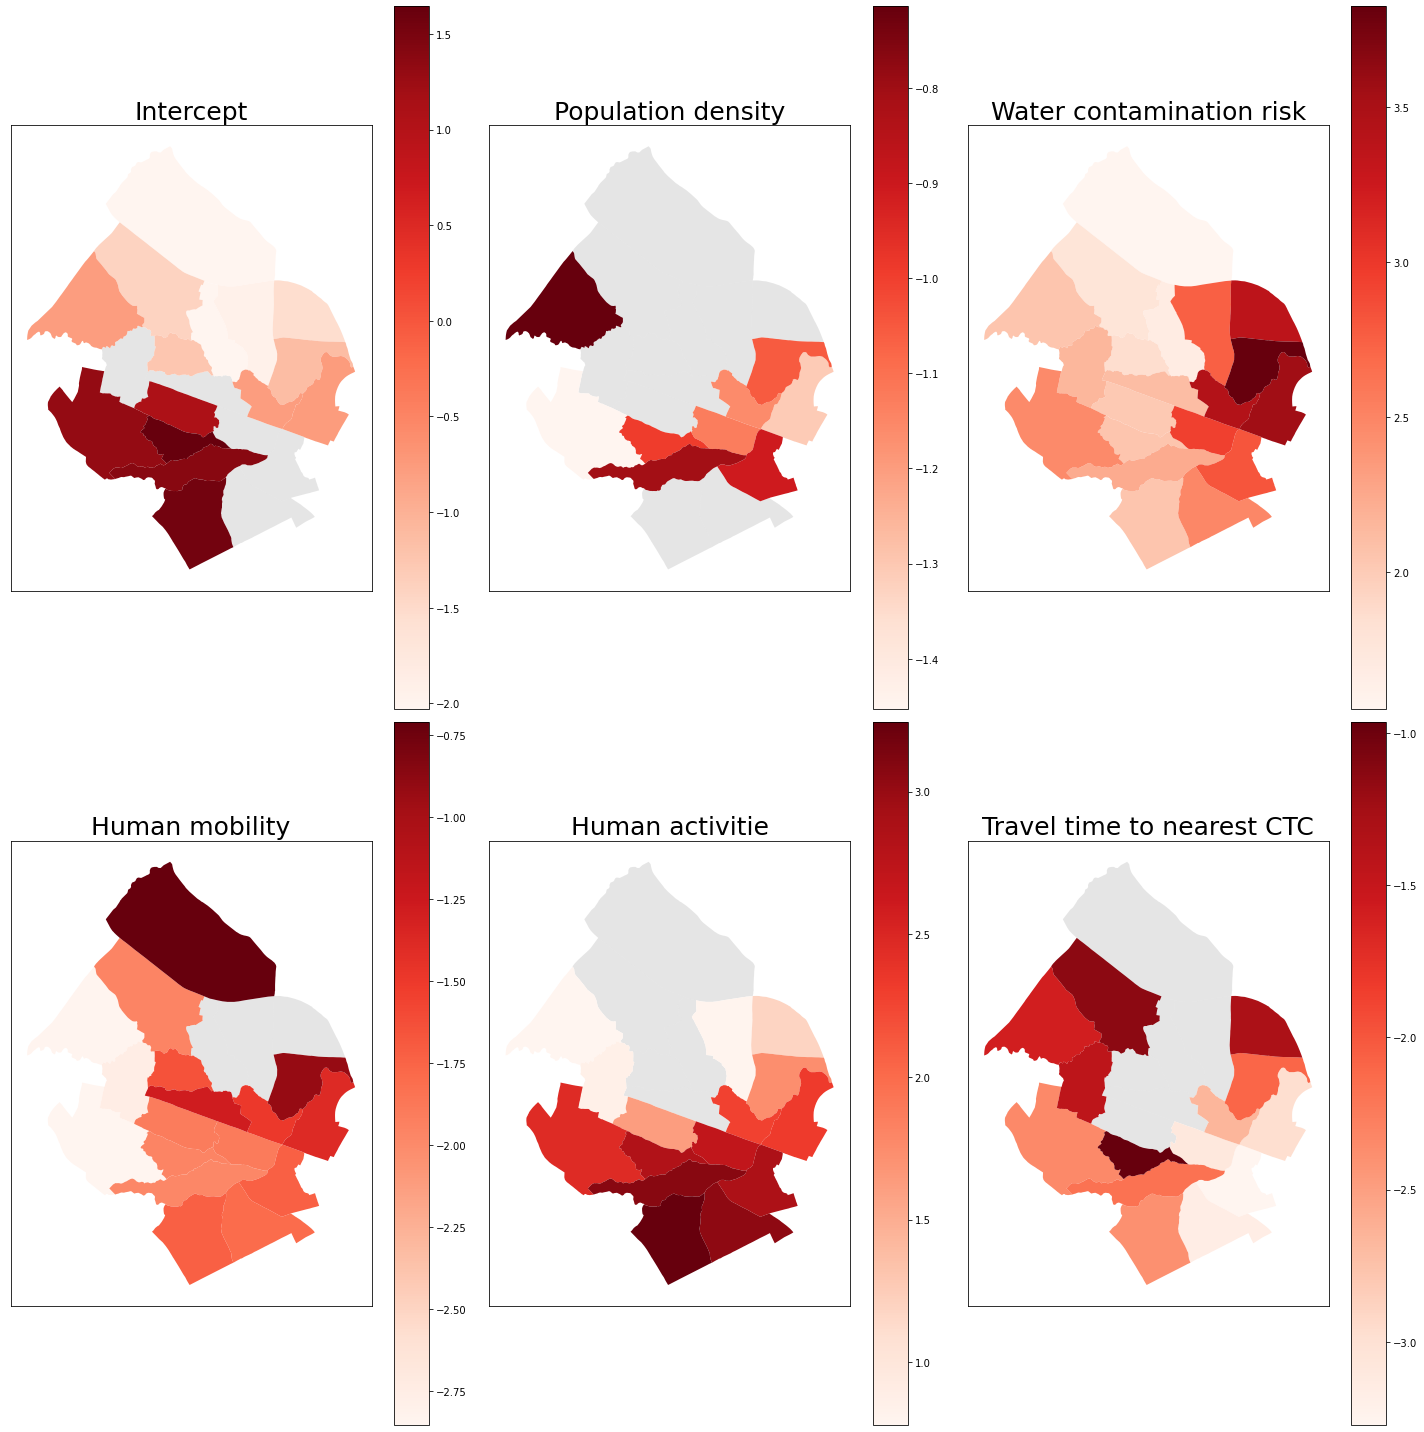

In [94]:
plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots(2,3,figsize = (2*10,2*10), subplot_kw = {'aspect':'equal'})

ax = ax.flatten()
for i,row in enumerate(filtered.T):
    list_temp = model_data.assign(toplot = filtered.T[i])
    list_temp.query('toplot == 0').sort_values('toplot').plot(color = 'grey',
                                                              marker = '.',
                                                              ax = ax[i],
                                                              alpha = 0.2)
    list_temp.query('toplot!= 0').sort_values('toplot').plot(column = 'toplot', cmap = 'Reds',marker = '.',
                                                              ax = ax[i],
                                                              legend = True)
    ax[i].set_title(['Intercept','Population density','Water contamination risk','Human mobility','Human activitie',
                     'Travel time to nearest CTC'][i], fontsize = 25)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
plt.show()

In [126]:
n_y = model_data['cases'].values.reshape(-1,1)
n_x =  mod2[['groundwater_contamination_risk','human_mobility',
             'impact_of_human_activities','tt_ctc_traffic']].values

In [127]:
n_x = (n_x - n_x.mean(axis = 0))/n_x.std(axis = 0)
n_y = (n_y - n_y.mean(axis = 0))/n_y.std(axis = 0)
coords = list(zip(model_data.centroid.x,model_data.centroid.y))

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


In [128]:
gwr_selector = Sel_BW(coords, n_y, n_x,constant=False, kernel = 'gaussian')
gwr_bw = gwr_selector.search(bw_min=3)
print(gwr_bw)

18.0


In [129]:
model = GWR(coords, n_y, n_x,gwr_bw, kernel = 'bisquare')
gwr_results = GWR(coords, n_y, n_x,gwr_bw).fit()
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                  20
Number of covariates:                                                     5

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              8.030
Log-likelihood:                                                     -19.253
AIC:                                                                 48.507
AICc:                                                                56.968
BIC:                                                                -36.906
R2:                                                                   0.598
Adj. R2:                                                              0.491

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [99]:
filtered = gwr_results.filter_tvals(alpha = 0.1)

In [100]:
filtered

array([[ 0.        ,  2.58964942, -2.32589432,  0.        ,  0.        ],
       [ 0.        ,  3.59861403,  0.        ,  1.7558866 , -2.0992701 ],
       [ 0.        ,  2.00453723, -3.19990109,  0.        , -2.10103458],
       [-1.88398367,  3.23981494,  0.        ,  0.        ,  0.        ],
       [-2.18759104,  2.49728575,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  3.01754332,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.730789  , -1.87342538,  3.27732683, -3.85955765],
       [-1.79875469,  2.25209939, -2.29745913,  0.        , -1.90268899],
       [ 1.82684354,  2.0761969 , -1.84939536,  2.8002751 ,  0.        ],
       [ 0.        ,  2.31461913, -2.00588828,  0.        ,  0.        ],
       [ 0.        ,  2.38337882, -1.97597054,  3.25549678, -2.13935247],
       [-1.81424473,  3.76967881,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  3.28939331,  0.        ,  2.4537883 , -3.12095128],
       [ 0.        ,  2.15421925, -2.7

In [101]:
filtered.T

array([[ 0.        ,  0.        ,  0.        , -1.88398367, -2.18759104,
         0.        ,  0.        , -1.79875469,  1.82684354,  0.        ,
         0.        , -1.81424473,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -2.04460871,  0.        ,  0.        ],
       [ 2.58964942,  3.59861403,  2.00453723,  3.23981494,  2.49728575,
         3.01754332,  2.730789  ,  2.25209939,  2.0761969 ,  2.31461913,
         2.38337882,  3.76967881,  3.28939331,  2.15421925,  2.9028661 ,
         3.38815295,  2.96153141,  3.84198411,  2.15647461,  2.42257152],
       [-2.32589432,  0.        , -3.19990109,  0.        ,  0.        ,
         0.        , -1.87342538, -2.29745913, -1.84939536, -2.00588828,
        -1.97597054,  0.        ,  0.        , -2.73343184, -1.77090117,
         0.        , -1.8332641 ,  0.        , -3.19993959, -1.83658732],
       [ 0.        ,  1.7558866 ,  0.        ,  0.        ,  0.        ,
         0.        ,  3.27732683,  0.        ,  

In [102]:
print(gwr_results.localR2[0][0])
print(gwr_results.adj_R2)
print(gwr_results.localR2)

0.7841427101332905
0.7077128227748943
[[0.78414271]
 [0.83246882]
 [0.84718885]
 [0.76480851]
 [0.83323773]
 [0.74507763]
 [0.80689489]
 [0.84209753]
 [0.69080415]
 [0.71283341]
 [0.73267834]
 [0.80858254]
 [0.86329809]
 [0.75703141]
 [0.83829685]
 [0.84007421]
 [0.825773  ]
 [0.79564841]
 [0.80895906]
 [0.72676174]]


C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


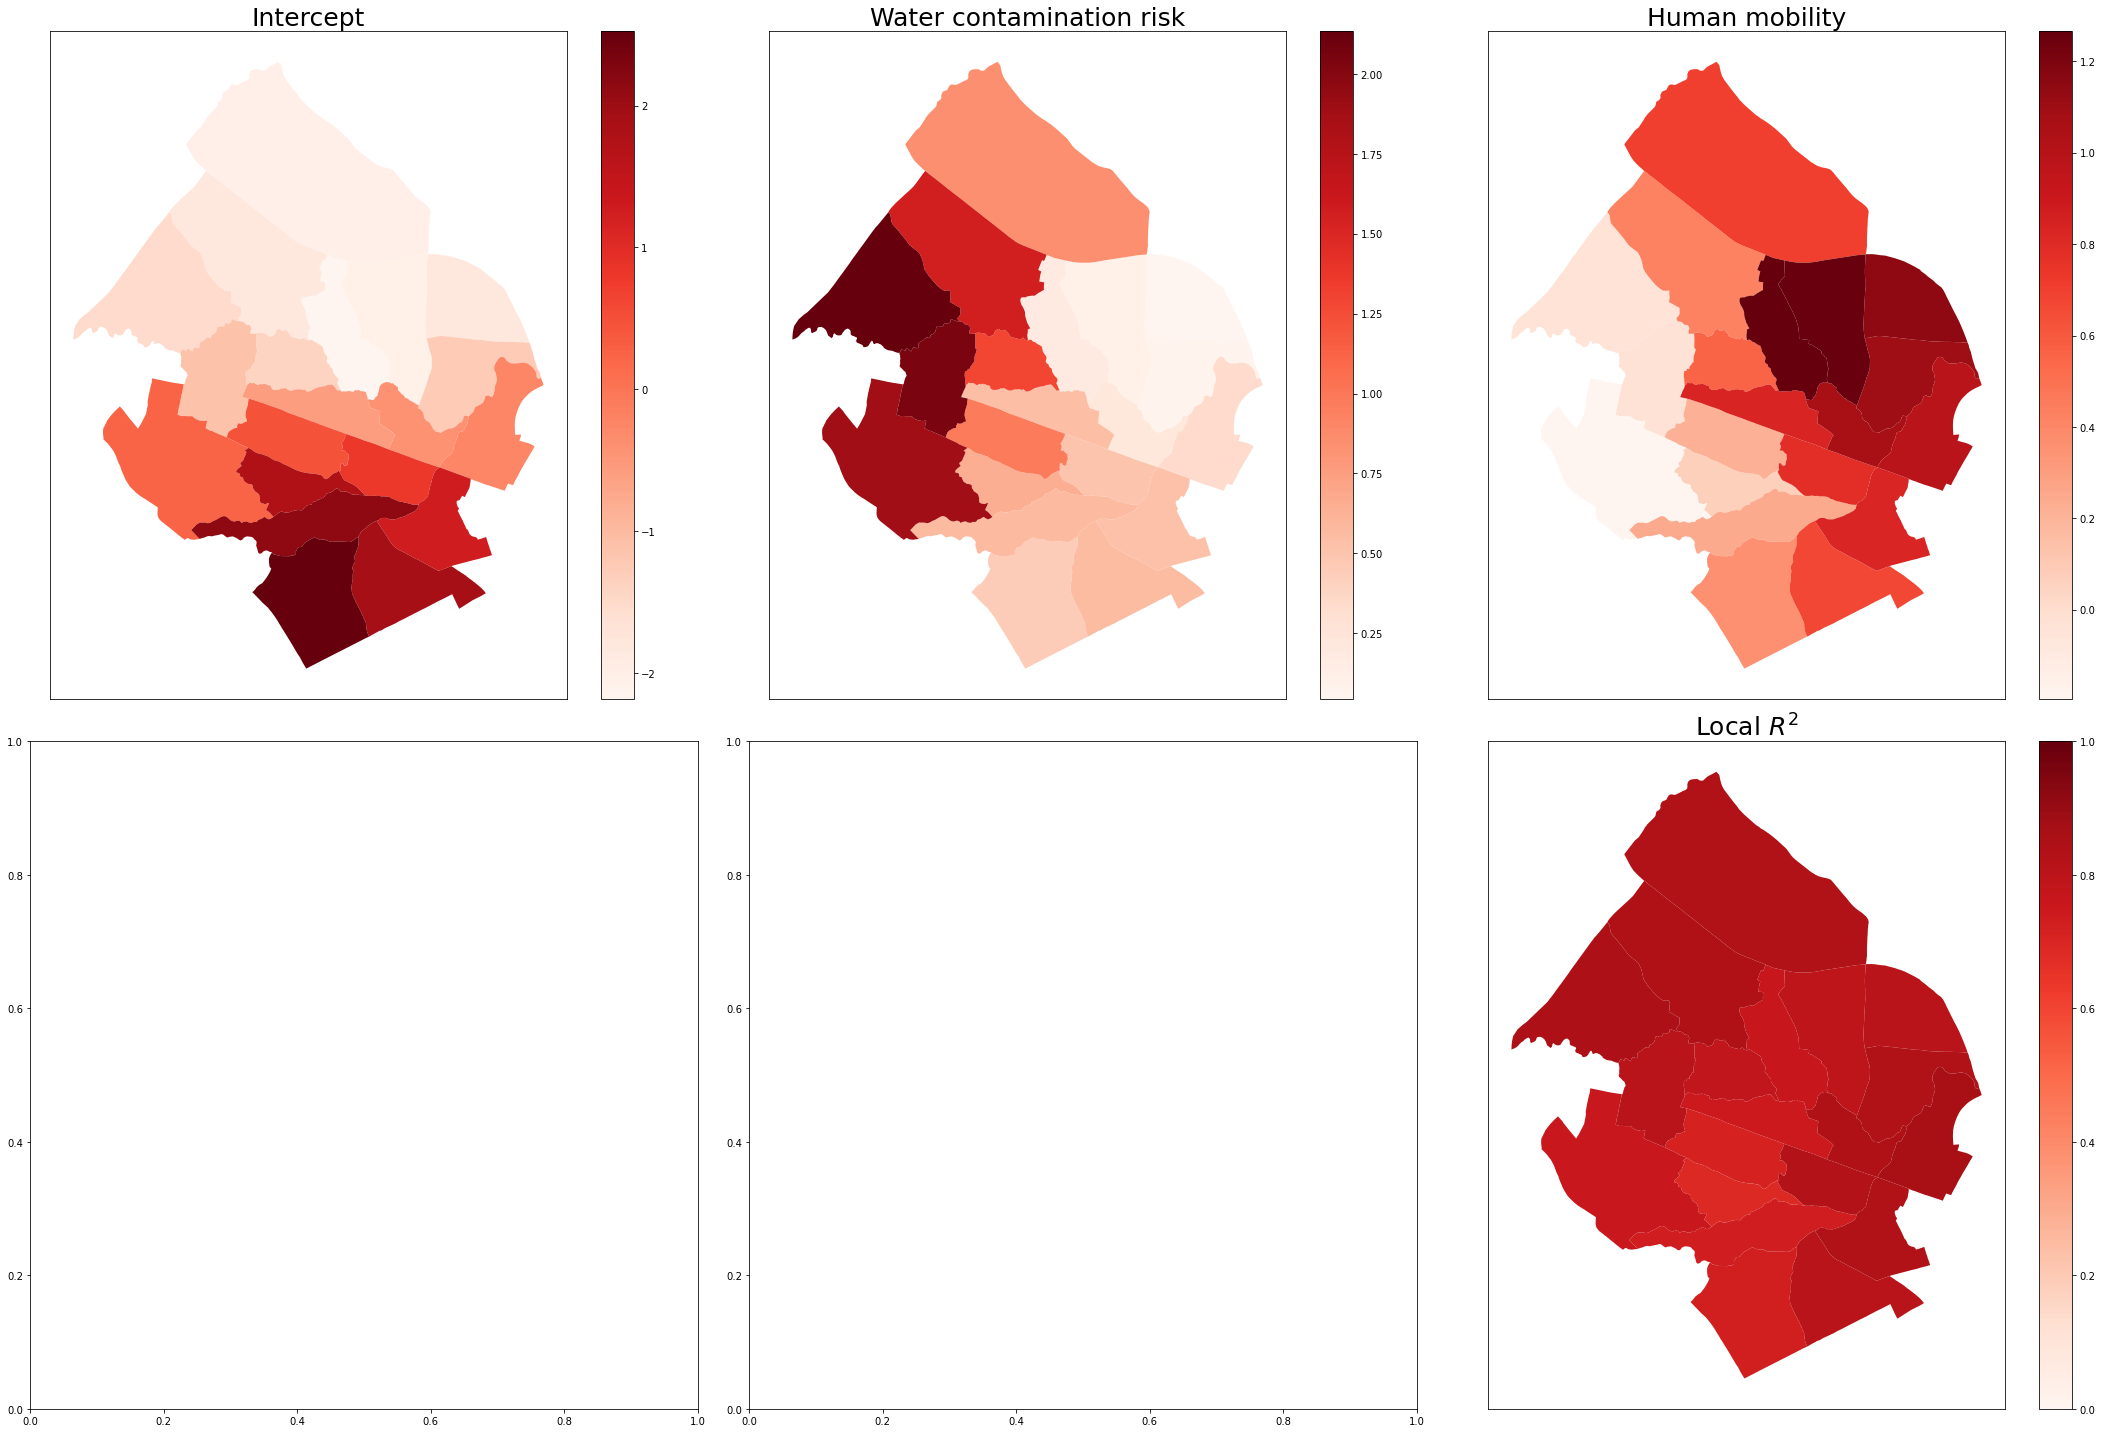

In [130]:
plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots(2,3,figsize = (3*10,2*10), subplot_kw = {'aspect':'equal'})

ax = ax.flatten()
for i,row in enumerate(filtered.T):
    list_temp = model_data.assign(toplot = filtered.T[i])
    list_temp.query('toplot == 0').sort_values('toplot').plot(color = 'grey',
                                                              marker = '.',
                                                              ax = ax[i],
                                                              alpha = 0.2)
    list_temp.query('toplot!= 0').sort_values('toplot').plot(column = 'toplot', cmap = 'Reds',marker = '.',
                                                              ax = ax[i],
                                                              legend = True)
    ax[i].set_title(['Intercept','Water contamination risk','Human mobility','Human activitie',
                     'Travel time to nearest CTC'][i], fontsize = 25)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

model_data.assign(r2 = gwr_results.localR2).sort_values('r2').plot(column = 'r2',ax = ax[-1],marker = '.', cmap = 'Reds',
                                                           legend = True, vmin = 0 , vmax = 1)
ax[-1].set_xticklabels([])
ax[-1].set_yticklabels([])
ax[-1].set_xticks([])
ax[-1].set_yticks([])
ax[-1].set_title('Local $R^2$', fontsize = 25)

fig.tight_layout()
plt.show()

In [132]:
model_data['r2']=gwr_results.localR2

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [138]:
model_data.columns

Index(['Ward_Name', 'cases', 'informality_percentage', 'pop_density_km',
       'groundwater_contamination_risk', 'exposure_to_water_resivoir',
       'human_mobility', 'impact_of_human_activities', 'no_hospitals',
       'tt_ctc_traffic', 'geometry', 'r2'],
      dtype='object')

In [141]:
model_data['coords'] = model_data['geometry'].apply(lambda x: x.representative_point().coords[:])
model_data['coords'] = [coords[0] for coords in model_data['coords']]

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [143]:
model_data.r2 = np.round(model_data.r2,2)

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


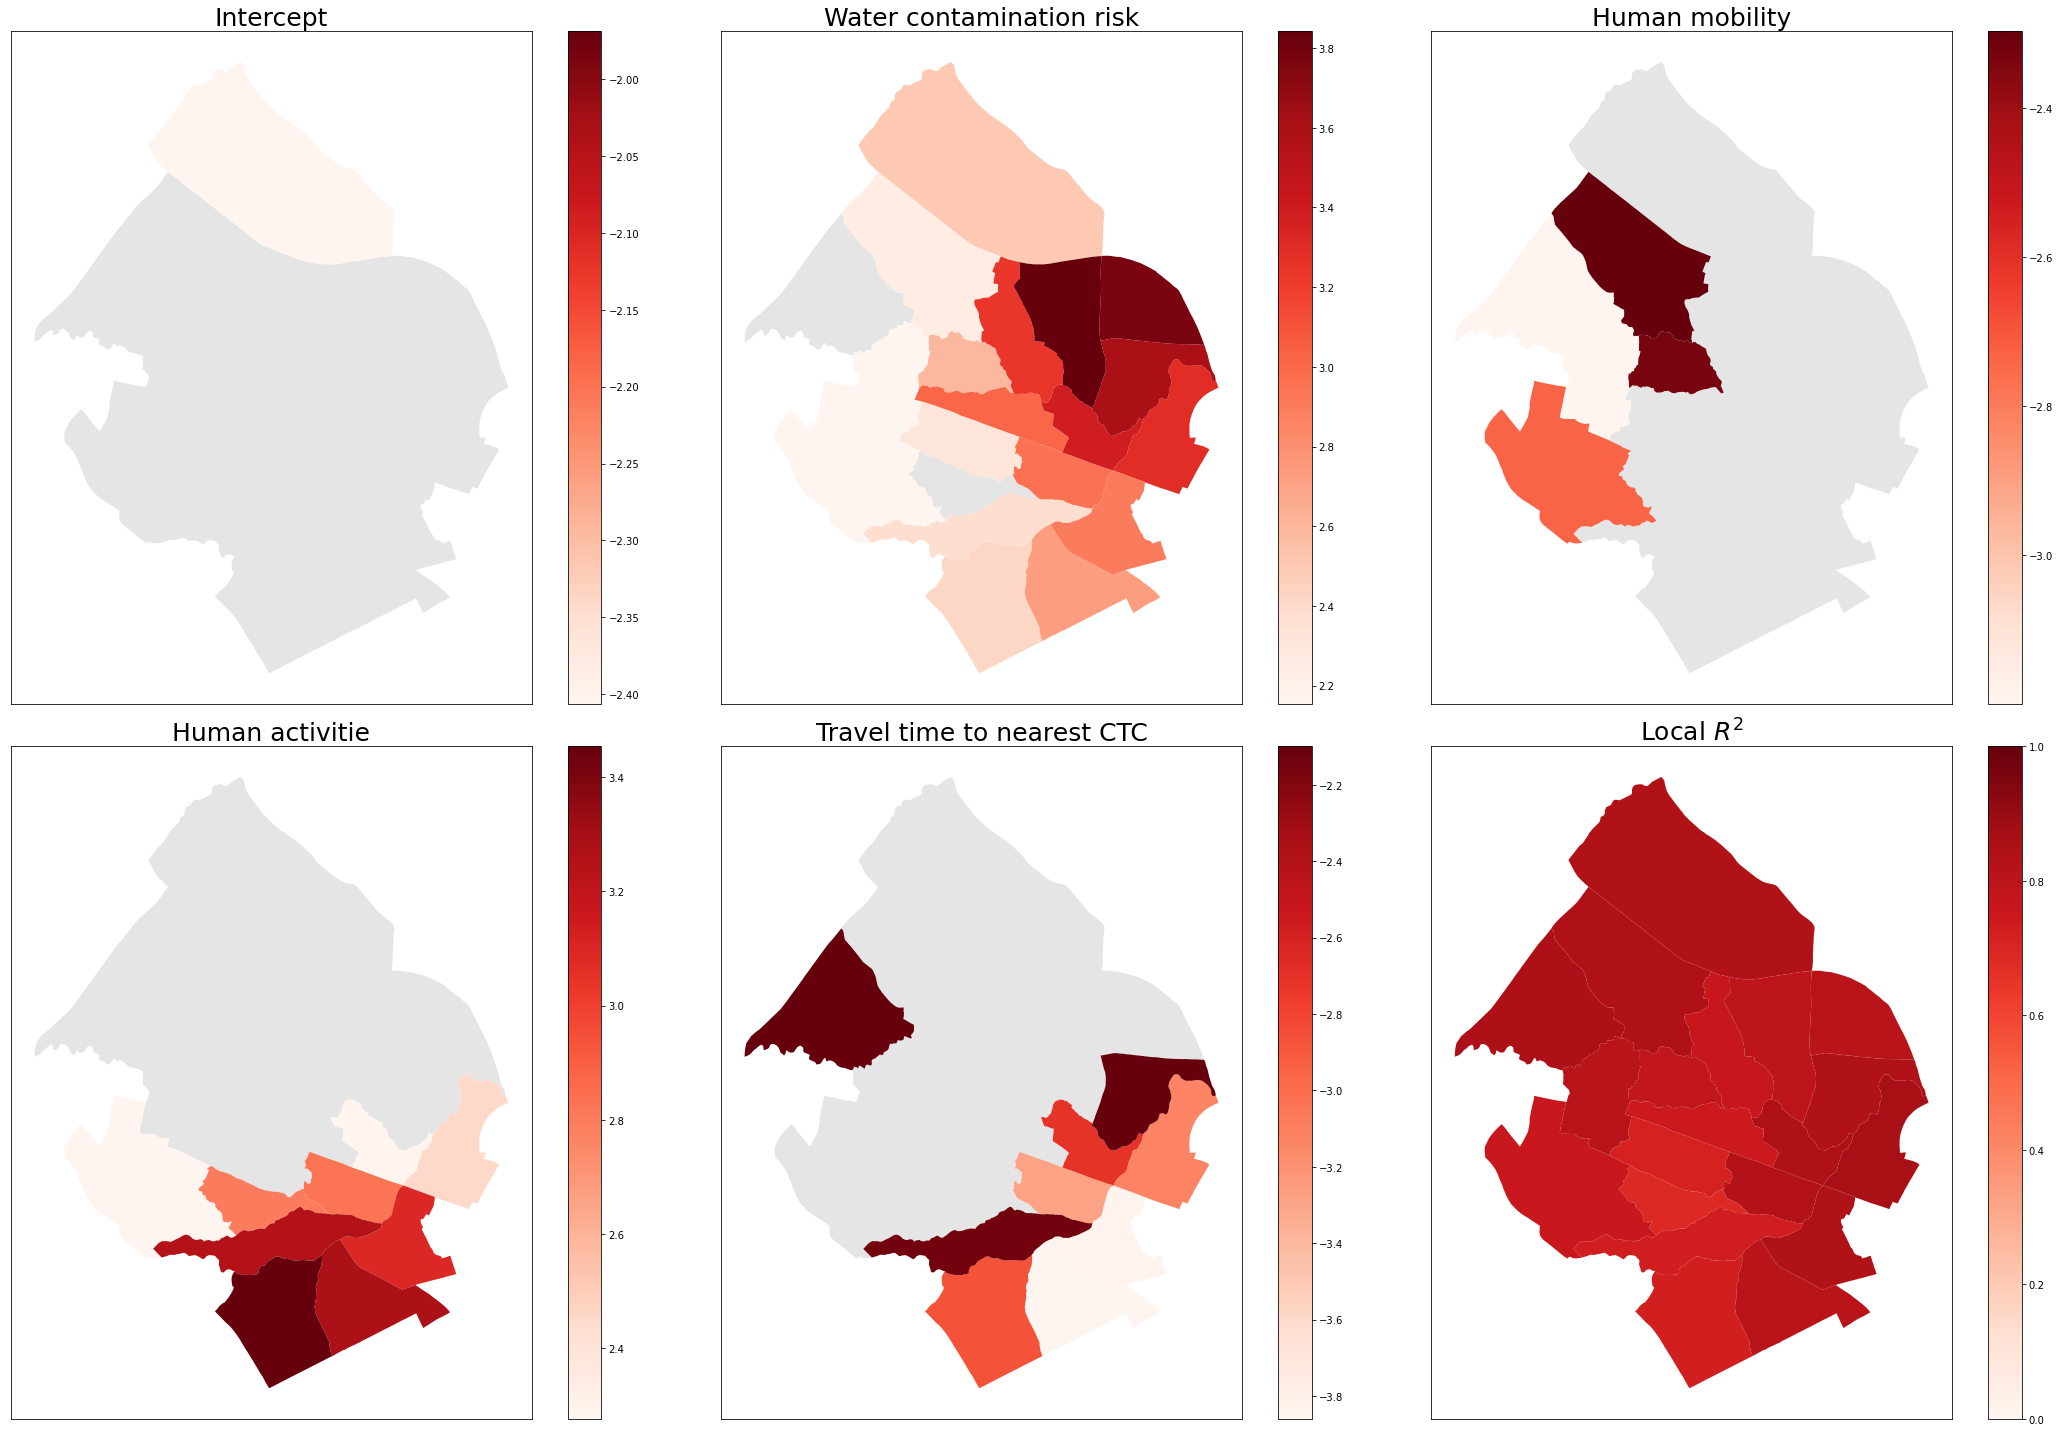

In [104]:
filtered = gwr_results.filter_tvals(alpha = 0.05)
plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots(2,3,figsize = (3*10,2*10), subplot_kw = {'aspect':'equal'})

ax = ax.flatten()
for i,row in enumerate(filtered.T):
    list_temp = model_data.assign(toplot = filtered.T[i])
    list_temp.query('toplot == 0').sort_values('toplot').plot(color = 'grey',
                                                              marker = '.',
                                                              ax = ax[i],
                                                              alpha = 0.2)
    list_temp.query('toplot!= 0').sort_values('toplot').plot(column = 'toplot', cmap = 'Reds',marker = '.',
                                                              ax = ax[i],
                                                              legend = True)
    ax[i].set_title(['Intercept','Water contamination risk','Human mobility','Human activitie',
                     'Travel time to nearest CTC'][i], fontsize = 25)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

model_data.assign(r2 = gwr_results.localR2).sort_values('r2').plot(column = 'r2',ax = ax[-1],marker = '.', cmap = 'Reds',
                                                           legend = True, vmin = 0 , vmax = 1)
ax[-1].set_xticklabels([])
ax[-1].set_yticklabels([])
ax[-1].set_xticks([])
ax[-1].set_yticks([])
ax[-1].set_title('Local $R^2$', fontsize = 25)

fig.tight_layout()
plt.savefig('./output/jpg/edited/GWR_final/multi_map.jpg', dpi=150)
plt.show()

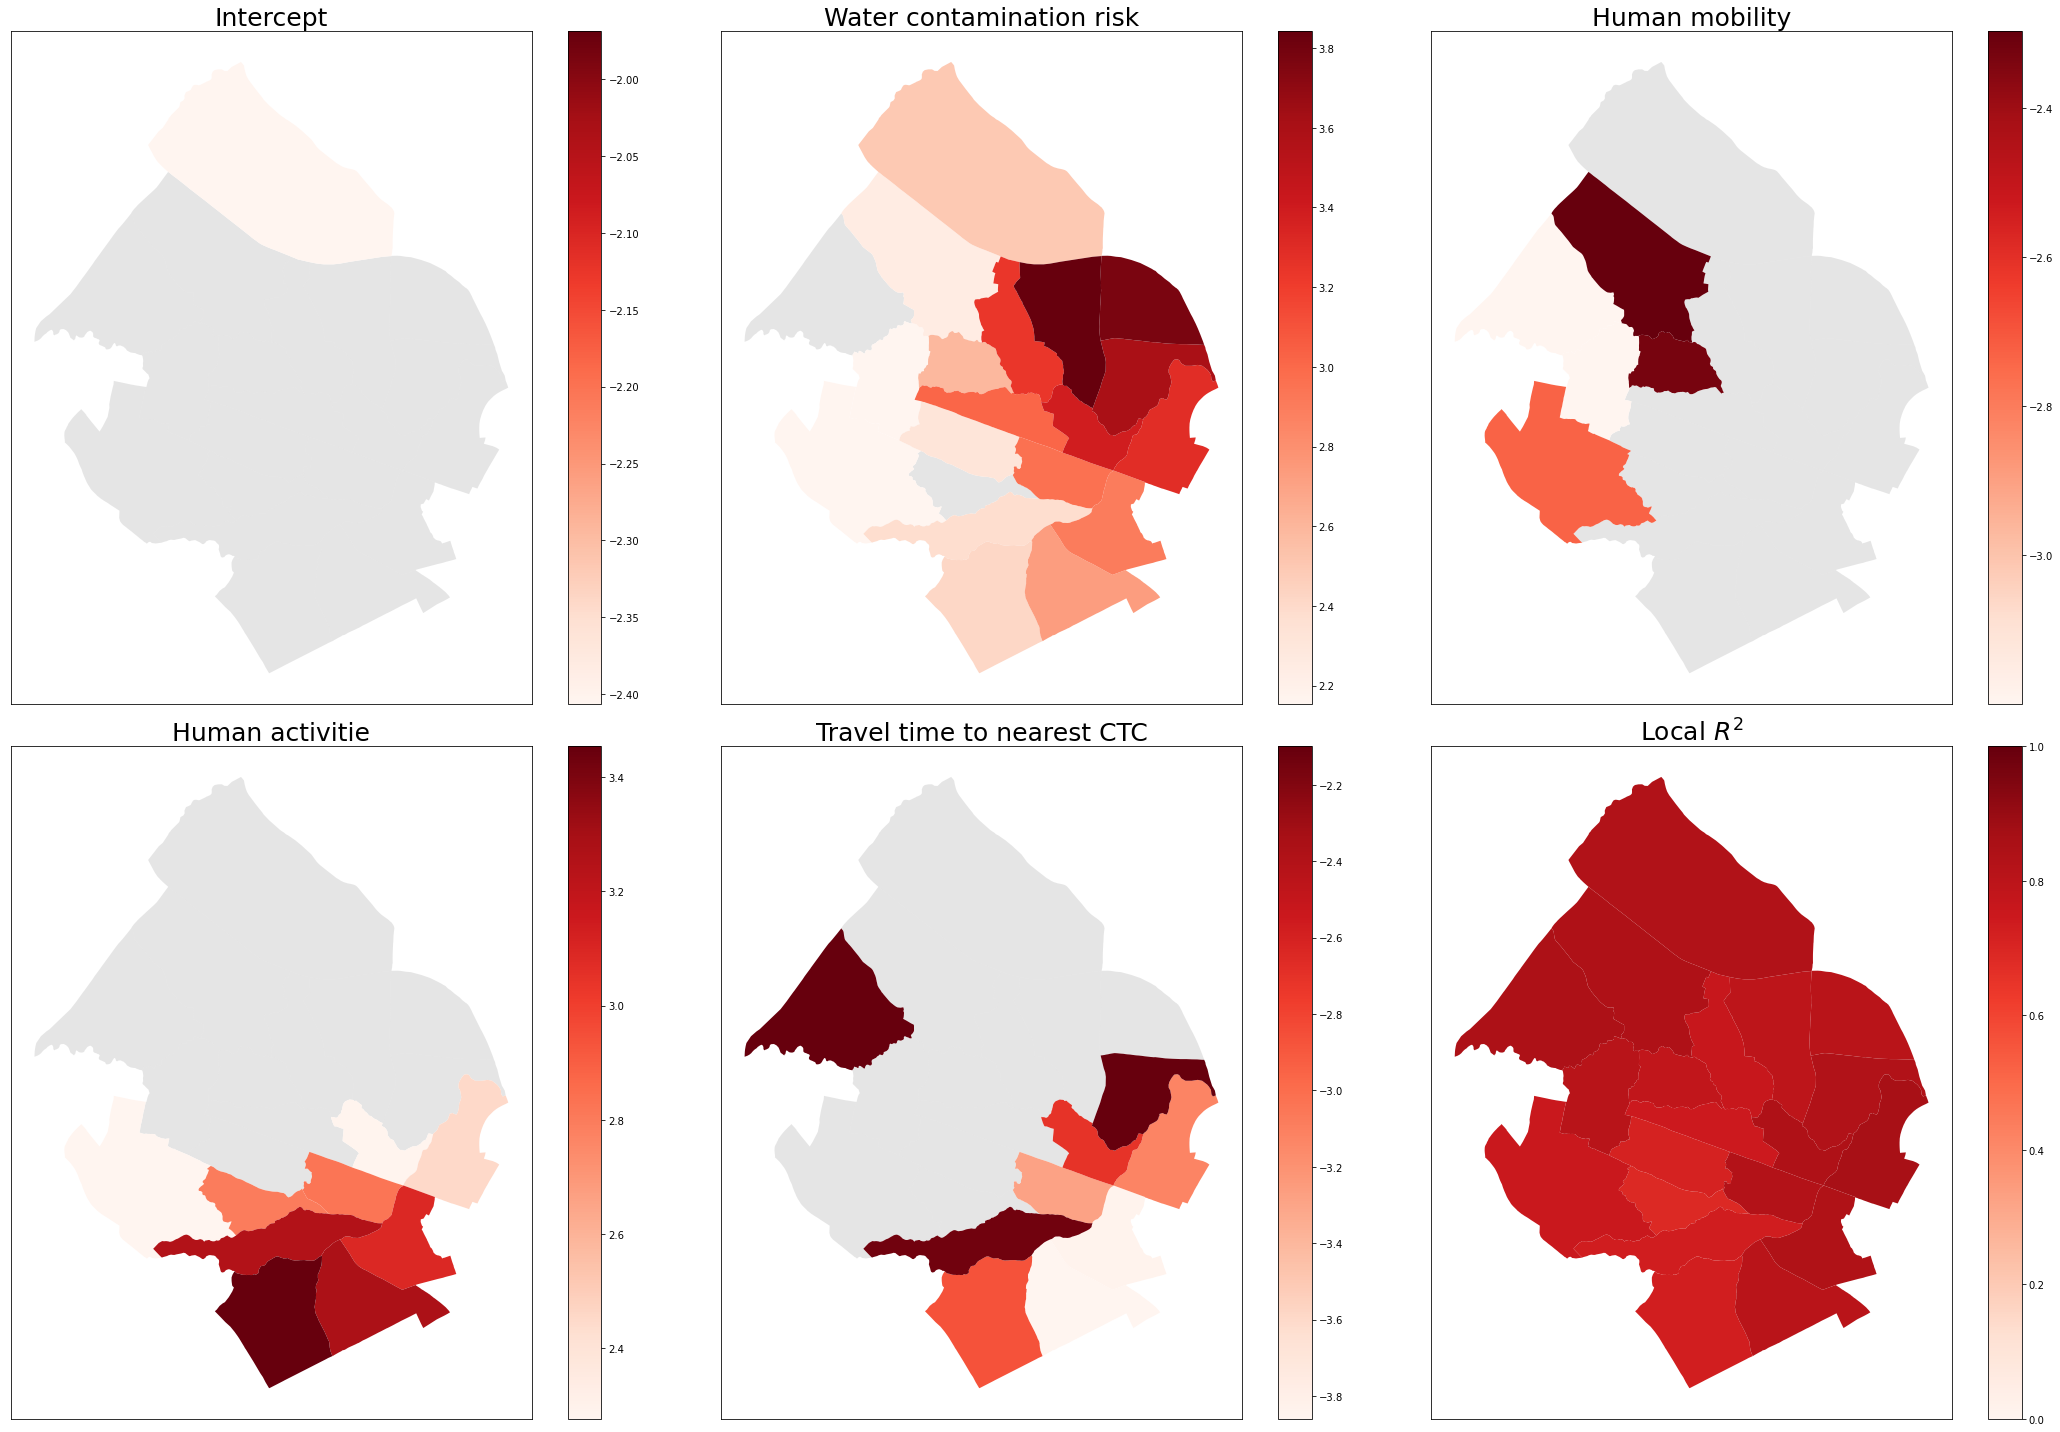

In [105]:
filtered = gwr_results.filter_tvals(alpha = 0.05)
plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots(2,3,figsize = (3*10,2*10), subplot_kw = {'aspect':'equal'})

ax = ax.flatten()
for i,row in enumerate(filtered.T):
    list_temp = model_data.assign(toplot = filtered.T[i])
    list_temp.query('toplot == 0').sort_values('toplot').plot(color = '#818080',
                                                              marker = '.',
                                                              ax = ax[i],
                                                              alpha = 0.2)
    list_temp.query('toplot!= 0').sort_values('toplot').plot(column = 'toplot', cmap = 'Reds',marker = '.',
                                                              ax = ax[i],
                                                              legend = True)
    ax[i].set_title(['Intercept','Water contamination risk','Human mobility','Human activitie',
                     'Travel time to nearest CTC'][i], fontsize = 25)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

model_data.assign(r2 = gwr_results.localR2).sort_values('r2').plot(column = 'r2',ax = ax[-1],marker = '.',
                                                        cmap = 'Reds',
                                                        legend = True, vmin = 0 , vmax = 1)
ax[-1].set_xticklabels([])
ax[-1].set_yticklabels([])
ax[-1].set_xticks([])
ax[-1].set_yticks([])
ax[-1].set_title('Local $R^2$', fontsize = 25)

fig.tight_layout()
plt.show()

In [150]:
n_y = model_data['cases'].values.reshape(-1,1)
n_x =  mod2[['informality_percentage','pop_density_km','groundwater_contamination_risk','human_mobility',
             'tt_ctc_traffic']].values

In [151]:
n_x = (n_x - n_x.mean(axis = 0))/n_x.std(axis = 0)
n_y = (n_y - n_y.mean(axis = 0))/n_y.std(axis = 0)
coords = list(zip(model_data.centroid.x,model_data.centroid.y))

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


In [152]:
gwr_selector = Sel_BW(coords, n_y, n_x,constant=False, kernel = 'gaussian')
gwr_bw = gwr_selector.search(bw_min=3)
print(gwr_bw)

18.0


In [109]:
model = GWR(coords, n_y, n_x,gwr_bw, kernel = 'bisquare')
gwr_results = GWR(coords, n_y, n_x,gwr_bw).fit()
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                  20
Number of covariates:                                                     6

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              8.918
Log-likelihood:                                                     -20.302
AIC:                                                                 52.604
AICc:                                                                63.938
BIC:                                                                -33.022
R2:                                                                   0.554
Adj. R2:                                                              0.395

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [110]:
filtered = gwr_results.filter_tvals(alpha = 1)

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas

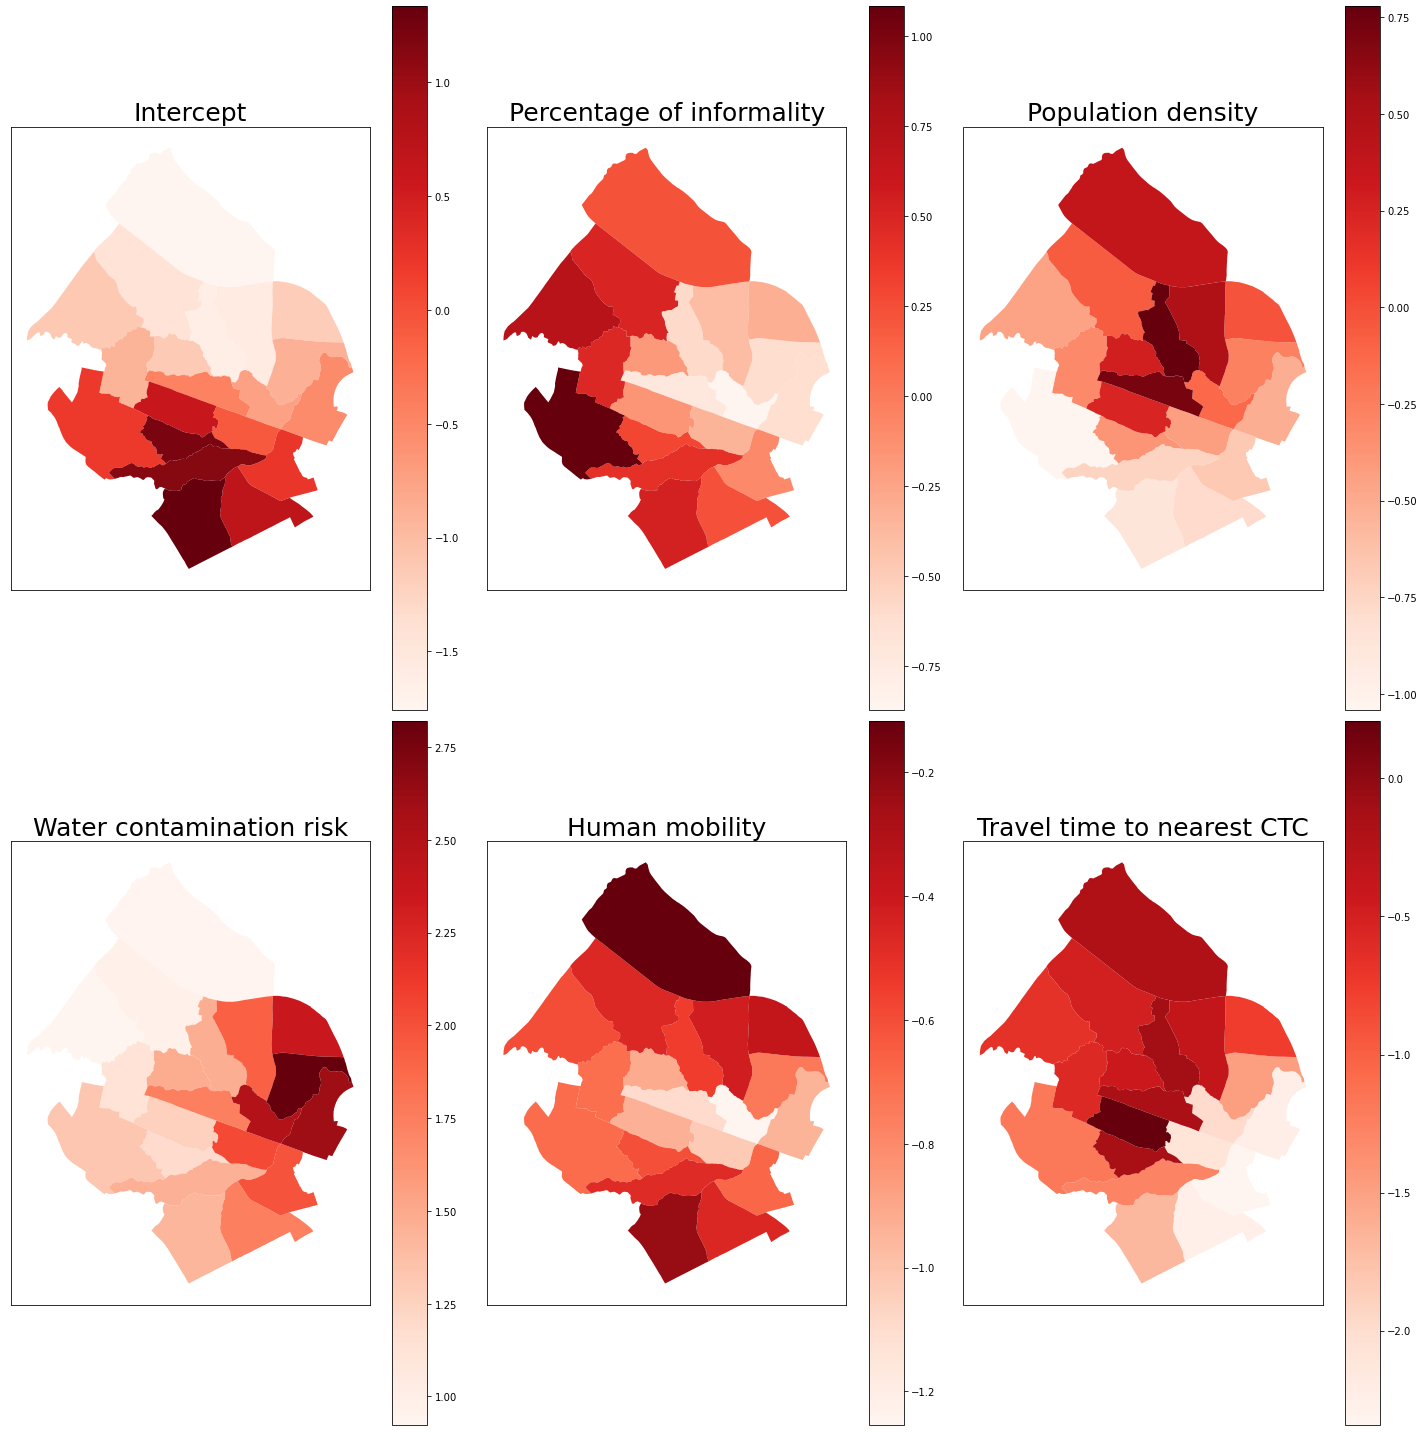

In [111]:
plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots(2,3,figsize = (2*10,2*10), subplot_kw = {'aspect':'equal'})

ax = ax.flatten()
for i,row in enumerate(filtered.T):
    list_temp = model_data.assign(toplot = filtered.T[i])
    list_temp.query('toplot == 0').sort_values('toplot').plot(color = 'grey',
                                                              marker = '.',
                                                              ax = ax[i],
                                                              alpha = 0.2)
    list_temp.query('toplot!= 0').sort_values('toplot').plot(column = 'toplot', cmap = 'Reds',marker = '.',
                                                              ax = ax[i],
                                                              legend = True)
    ax[i].set_title(['Intercept','Percentage of informality','Population density','Water contamination risk',
                     'Human mobility','Travel time to nearest CTC'][i], fontsize = 25)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
plt.show()

In [153]:
n_y = model_data['cases'].values.reshape(-1,1)
n_x =  mod2[['informality_percentage']].values
n_x = (n_x - n_x.mean(axis = 0))/n_x.std(axis = 0)
n_y = (n_y - n_y.mean(axis = 0))/n_y.std(axis = 0)
coords = list(zip(model_data.centroid.x,model_data.centroid.y))
gwr_selector = Sel_BW(coords, n_y, n_x,constant=False, kernel = 'gaussian')
gwr_bw = gwr_selector.search(bw_min=3)
model = GWR(coords, n_y, n_x,gwr_bw, kernel = 'bisquare')
gwr_results = GWR(coords, n_y, n_x,gwr_bw).fit()
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                  20
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             13.512
Log-likelihood:                                                     -24.457
AIC:                                                                 52.914
AICc:                                                                56.414
BIC:                                                                -40.411
R2:                                                                   0.324
Adj. R2:                                                              0.287

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


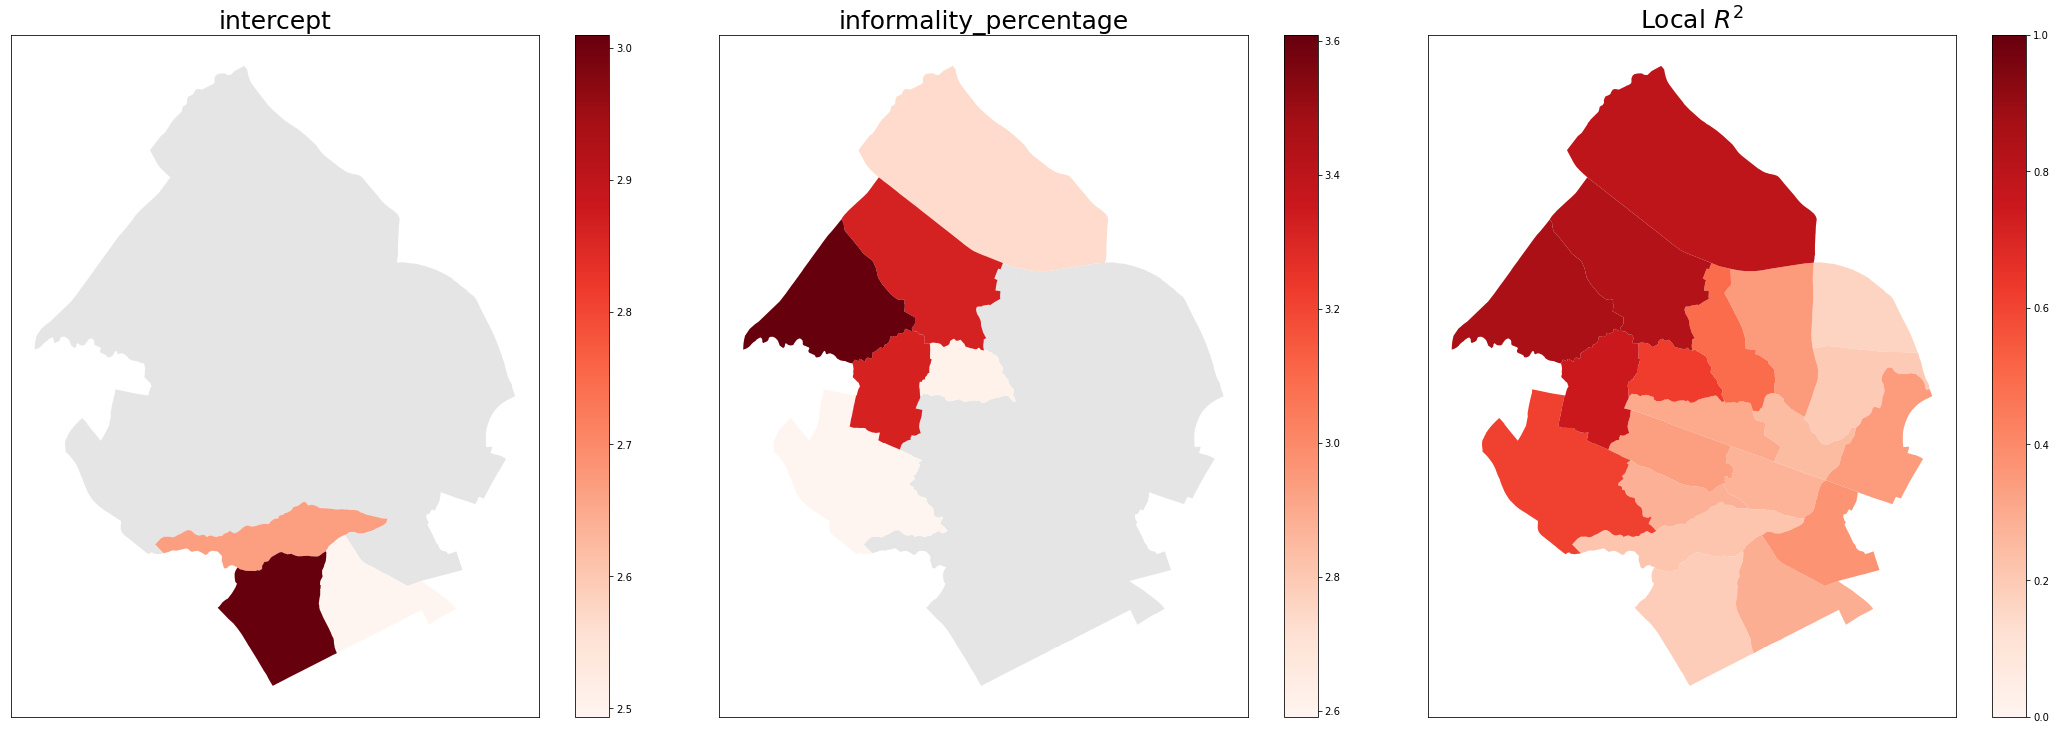

In [113]:
filtered = gwr_results.filter_tvals(alpha = 0.05)
plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots(1,3,figsize = (3*10,10), subplot_kw = {'aspect':'equal'})

ax = ax.flatten()
for i,row in enumerate(filtered.T):
    list_temp = model_data.assign(toplot = filtered.T[i])
    list_temp.query('toplot == 0').sort_values('toplot').plot(color = 'grey',
                                                              marker = '.',
                                                              ax = ax[i],
                                                              alpha = 0.2)
    list_temp.query('toplot!= 0').sort_values('toplot').plot(column = 'toplot', cmap = 'Reds',marker = '.',
                                                              ax = ax[i],
                                                              legend = True)
    ax[i].set_title(['intercept','informality_percentage'][i], fontsize = 25)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

model_data.assign(r2 = gwr_results.localR2).sort_values('r2').plot(column = 'r2',ax = ax[-1],marker = '.', cmap = 'Reds',
                                                           legend = True, vmin = 0 , vmax = 1)
ax[-1].set_xticklabels([])
ax[-1].set_yticklabels([])
ax[-1].set_xticks([])
ax[-1].set_yticks([])
ax[-1].set_title('Local $R^2$', fontsize = 25)

fig.tight_layout()
plt.savefig('./output/jpg/edited/GWR_final/informality_map.jpg', dpi=150)
plt.show()

In [155]:
n_y = model_data['cases'].values.reshape(-1,1)
n_x =  mod2[['pop_density_km']].values
n_x = (n_x - n_x.mean(axis = 0))/n_x.std(axis = 0)
n_y = (n_y - n_y.mean(axis = 0))/n_y.std(axis = 0)
coords = list(zip(model_data.centroid.x,model_data.centroid.y))
gwr_selector = Sel_BW(coords, n_y, n_x,constant=False, kernel = 'gaussian')
gwr_bw = gwr_selector.search(bw_min=3)
model = GWR(coords, n_y, n_x,gwr_bw, kernel = 'bisquare')
gwr_results = GWR(coords, n_y, n_x,gwr_bw).fit()
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                  20
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             14.846
Log-likelihood:                                                     -25.399
AIC:                                                                 54.797
AICc:                                                                58.297
BIC:                                                                -39.077
R2:                                                                   0.258
Adj. R2:                                                              0.216

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


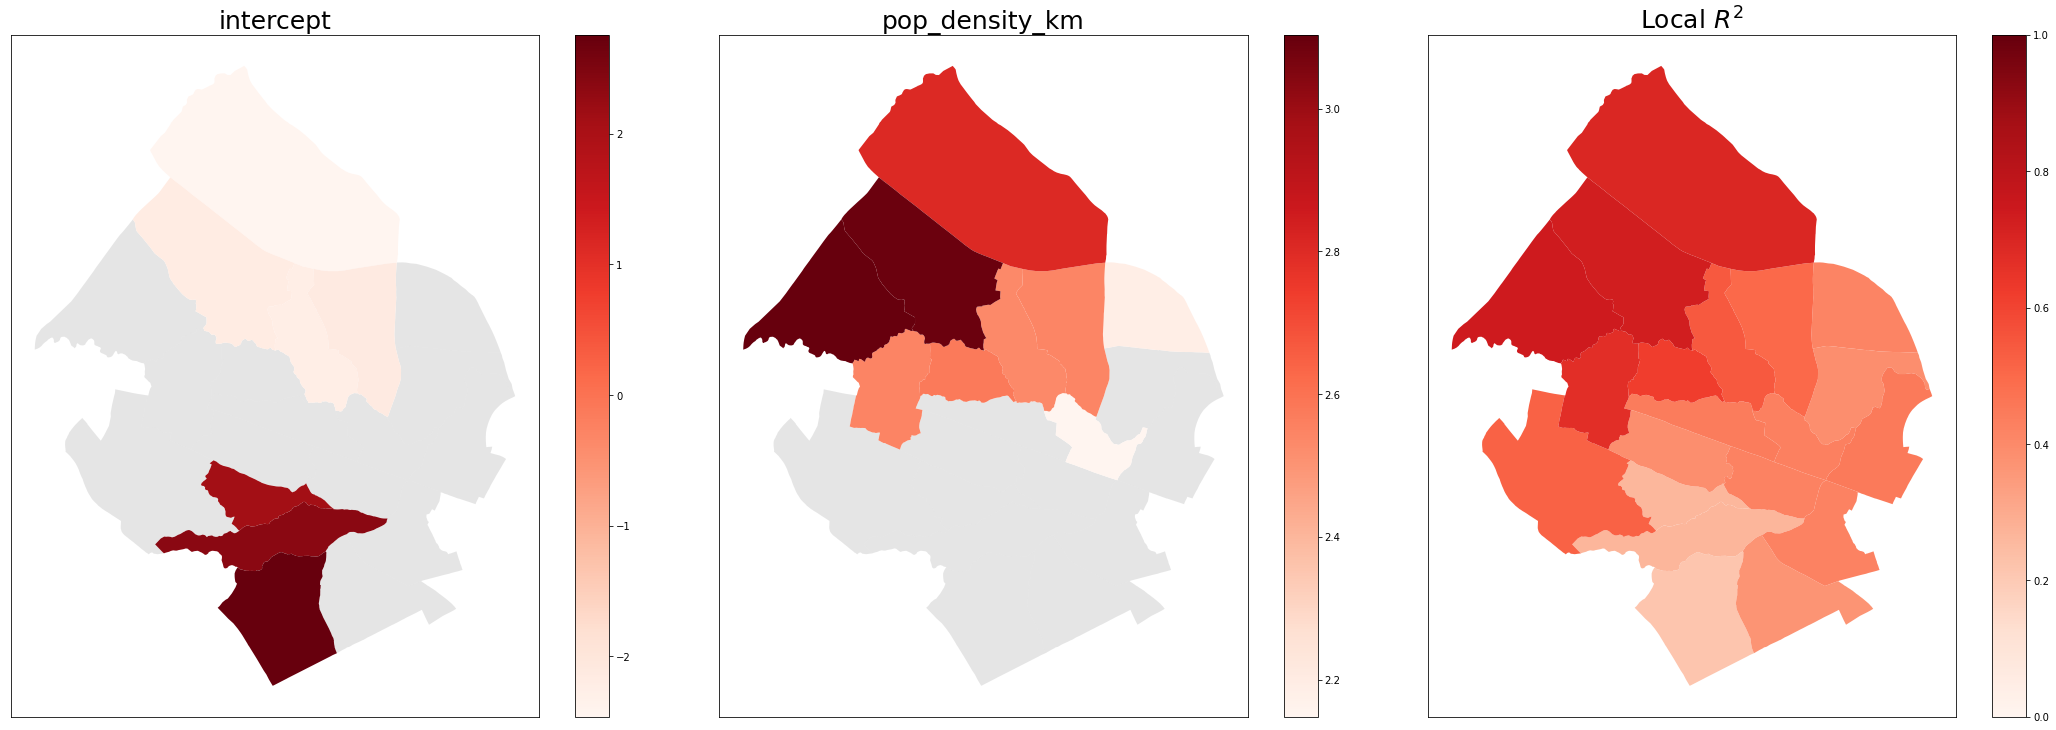

In [115]:
filtered = gwr_results.filter_tvals(alpha = 0.05)
plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots(1,3,figsize = (3*10,10), subplot_kw = {'aspect':'equal'})

ax = ax.flatten()
for i,row in enumerate(filtered.T):
    list_temp = model_data.assign(toplot = filtered.T[i])
    list_temp.query('toplot == 0').sort_values('toplot').plot(color = 'grey',
                                                              marker = '.',
                                                              ax = ax[i],
                                                              alpha = 0.2)
    list_temp.query('toplot!= 0').sort_values('toplot').plot(column = 'toplot', cmap = 'Reds',marker = '.',
                                                              ax = ax[i],
                                                              legend = True)
    ax[i].set_title(['intercept','pop_density_km'][i], fontsize = 25)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

model_data.assign(r2 = gwr_results.localR2).sort_values('r2').plot(column = 'r2',ax = ax[-1],marker = '.', cmap = 'Reds',
                                                           legend = True, vmin = 0 , vmax = 1)
ax[-1].set_xticklabels([])
ax[-1].set_yticklabels([])
ax[-1].set_xticks([])
ax[-1].set_yticks([])
ax[-1].set_title('Local $R^2$', fontsize = 25)

fig.tight_layout()
plt.savefig('./output/jpg/edited/GWR_final/pop_density_map.jpg', dpi=150)
plt.show()

In [116]:
n_y = model_data['cases'].values.reshape(-1,1)
n_x =  mod2[['groundwater_contamination_risk']].values
n_x = (n_x - n_x.mean(axis = 0))/n_x.std(axis = 0)
n_y = (n_y - n_y.mean(axis = 0))/n_y.std(axis = 0)
coords = list(zip(model_data.centroid.x,model_data.centroid.y))
gwr_selector = Sel_BW(coords, n_y, n_x,constant=False, kernel = 'gaussian')
gwr_bw = gwr_selector.search(bw_min=3)
model = GWR(coords, n_y, n_x,gwr_bw, kernel = 'bisquare')
gwr_results = GWR(coords, n_y, n_x,gwr_bw).fit()
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                  20
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             16.040
Log-likelihood:                                                     -26.172
AIC:                                                                 56.344
AICc:                                                                59.844
BIC:                                                                -37.883
R2:                                                                   0.198
Adj. R2:                                                              0.153

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


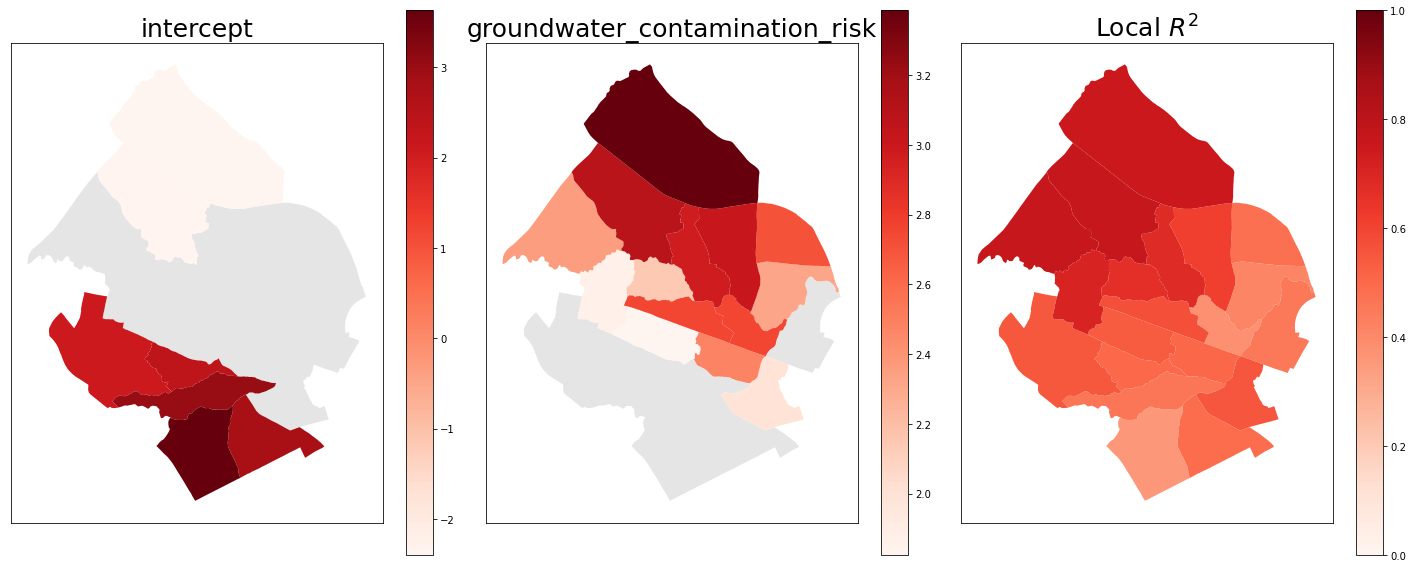

In [117]:
filtered = gwr_results.filter_tvals(alpha = 0.1)
plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots(1,3,figsize = (2*10,8), subplot_kw = {'aspect':'equal'})

ax = ax.flatten()
for i,row in enumerate(filtered.T):
    list_temp = model_data.assign(toplot = filtered.T[i])
    list_temp.query('toplot == 0').sort_values('toplot').plot(color = 'grey',
                                                              marker = '.',
                                                              ax = ax[i],
                                                              alpha = 0.2)
    list_temp.query('toplot!= 0').sort_values('toplot').plot(column = 'toplot', cmap = 'Reds',marker = '.',
                                                              ax = ax[i],
                                                              legend = True)
    ax[i].set_title(['intercept','groundwater_contamination_risk'][i], fontsize = 25)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

model_data.assign(r2 = gwr_results.localR2).sort_values('r2').plot(column = 'r2',ax = ax[-1],marker = '.', cmap = 'Reds',
                                                           legend = True, vmin = 0 , vmax = 1)
ax[-1].set_xticklabels([])
ax[-1].set_yticklabels([])
ax[-1].set_xticks([])
ax[-1].set_yticks([])
ax[-1].set_title('Local $R^2$', fontsize = 25)

fig.tight_layout()
plt.show()

In [118]:
n_y = model_data['cases'].values.reshape(-1,1)
n_x =  mod2[['human_mobility']].values
n_x = (n_x - n_x.mean(axis = 0))/n_x.std(axis = 0)
n_y = (n_y - n_y.mean(axis = 0))/n_y.std(axis = 0)
coords = list(zip(model_data.centroid.x,model_data.centroid.y))
gwr_selector = Sel_BW(coords, n_y, n_x,constant=False, kernel = 'gaussian')
gwr_bw = gwr_selector.search(bw_min=3)
model = GWR(coords, n_y, n_x,gwr_bw, kernel = 'bisquare')
gwr_results = GWR(coords, n_y, n_x,gwr_bw).fit()
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                  20
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             16.634
Log-likelihood:                                                     -26.536
AIC:                                                                 57.072
AICc:                                                                60.572
BIC:                                                                -37.289
R2:                                                                   0.168
Adj. R2:                                                              0.122

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


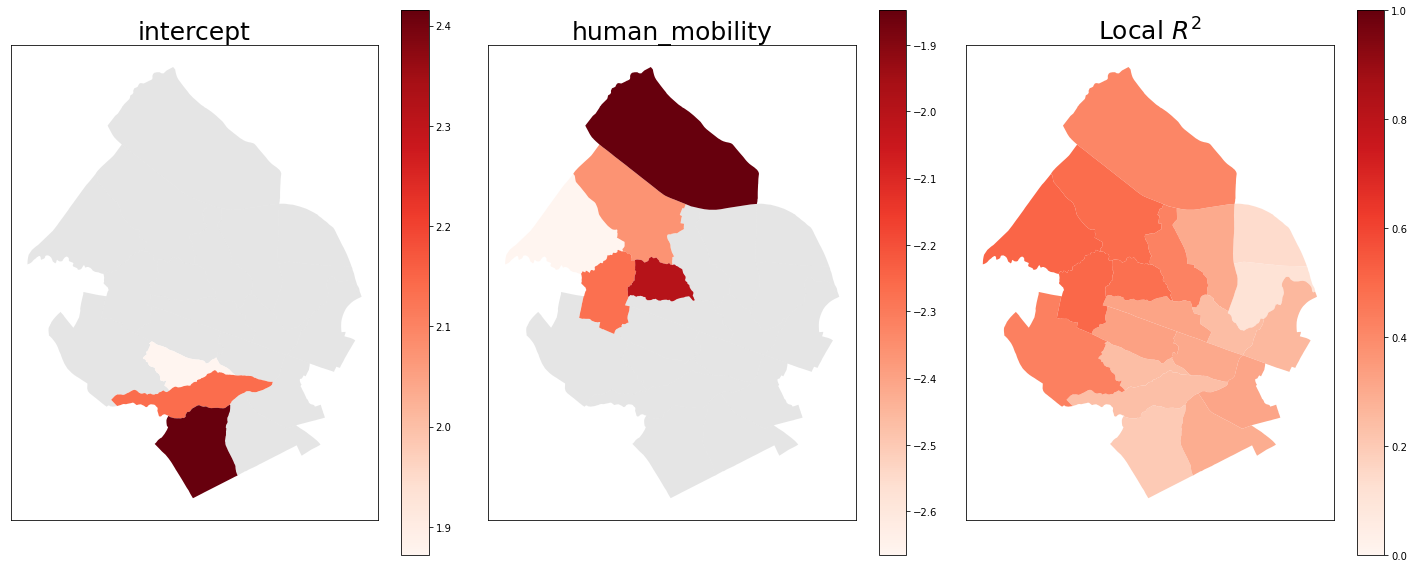

In [119]:
filtered = gwr_results.filter_tvals(alpha = 0.1)
plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots(1,3,figsize = (2*10,8), subplot_kw = {'aspect':'equal'})

ax = ax.flatten()
for i,row in enumerate(filtered.T):
    list_temp = model_data.assign(toplot = filtered.T[i])
    list_temp.query('toplot == 0').sort_values('toplot').plot(color = 'grey',
                                                              marker = '.',
                                                              ax = ax[i],
                                                              alpha = 0.2)
    list_temp.query('toplot!= 0').sort_values('toplot').plot(column = 'toplot', cmap = 'Reds',marker = '.',
                                                              ax = ax[i],
                                                              legend = True)
    ax[i].set_title(['intercept','human_mobility'][i], fontsize = 25)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

model_data.assign(r2 = gwr_results.localR2).sort_values('r2').plot(column = 'r2',ax = ax[-1],marker = '.', cmap = 'Reds',
                                                           legend = True, vmin = 0 , vmax = 1)
ax[-1].set_xticklabels([])
ax[-1].set_yticklabels([])
ax[-1].set_xticks([])
ax[-1].set_yticks([])
ax[-1].set_title('Local $R^2$', fontsize = 25)

fig.tight_layout()
plt.show()

In [120]:
n_y = model_data['cases'].values.reshape(-1,1)
n_x =  mod2[['impact_of_human_activities']].values
n_x = (n_x - n_x.mean(axis = 0))/n_x.std(axis = 0)
n_y = (n_y - n_y.mean(axis = 0))/n_y.std(axis = 0)
coords = list(zip(model_data.centroid.x,model_data.centroid.y))
gwr_selector = Sel_BW(coords, n_y, n_x,constant=False, kernel = 'gaussian')
gwr_bw = gwr_selector.search(bw_min=3)
model = GWR(coords, n_y, n_x,gwr_bw, kernel = 'bisquare')
gwr_results = GWR(coords, n_y, n_x,gwr_bw).fit()
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                  20
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             19.962
Log-likelihood:                                                     -28.360
AIC:                                                                 60.720
AICc:                                                                64.220
BIC:                                                                -33.961
R2:                                                                   0.002
Adj. R2:                                                             -0.054

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


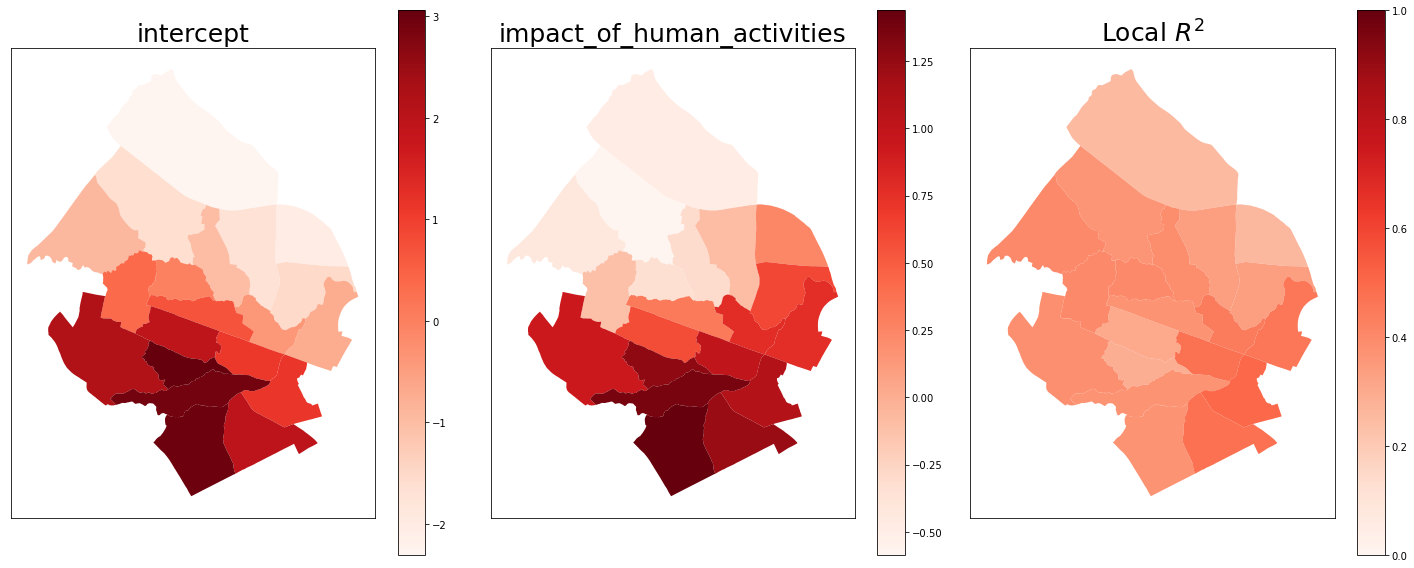

In [121]:
filtered = gwr_results.filter_tvals(alpha = 1)
plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots(1,3,figsize = (2*10,8), subplot_kw = {'aspect':'equal'})

ax = ax.flatten()
for i,row in enumerate(filtered.T):
    list_temp = model_data.assign(toplot = filtered.T[i])
    list_temp.query('toplot == 0').sort_values('toplot').plot(color = 'grey',
                                                              marker = '.',
                                                              ax = ax[i],
                                                              alpha = 0.2)
    list_temp.query('toplot!= 0').sort_values('toplot').plot(column = 'toplot', cmap = 'Reds',marker = '.',
                                                              ax = ax[i],
                                                              legend = True)
    ax[i].set_title(['intercept','impact_of_human_activities'][i], fontsize = 25)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

model_data.assign(r2 = gwr_results.localR2).sort_values('r2').plot(column = 'r2',ax = ax[-1],marker = '.', cmap = 'Reds',
                                                           legend = True, vmin = 0 , vmax = 1)
ax[-1].set_xticklabels([])
ax[-1].set_yticklabels([])
ax[-1].set_xticks([])
ax[-1].set_yticks([])
ax[-1].set_title('Local $R^2$', fontsize = 25)

fig.tight_layout()
plt.show()

In [122]:
n_y = model_data['cases'].values.reshape(-1,1)
n_x =  mod2[['tt_ctc_traffic']].values
n_x = (n_x - n_x.mean(axis = 0))/n_x.std(axis = 0)
n_y = (n_y - n_y.mean(axis = 0))/n_y.std(axis = 0)
coords = list(zip(model_data.centroid.x,model_data.centroid.y))
gwr_selector = Sel_BW(coords, n_y, n_x,constant=False, kernel = 'gaussian')
gwr_bw = gwr_selector.search(bw_min=3)
model = GWR(coords, n_y, n_x,gwr_bw, kernel = 'bisquare')
gwr_results = GWR(coords, n_y, n_x,gwr_bw).fit()
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                  20
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             13.230
Log-likelihood:                                                     -24.246
AIC:                                                                 52.492
AICc:                                                                55.992
BIC:                                                                -40.694
R2:                                                                   0.339
Adj. R2:                                                              0.302

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


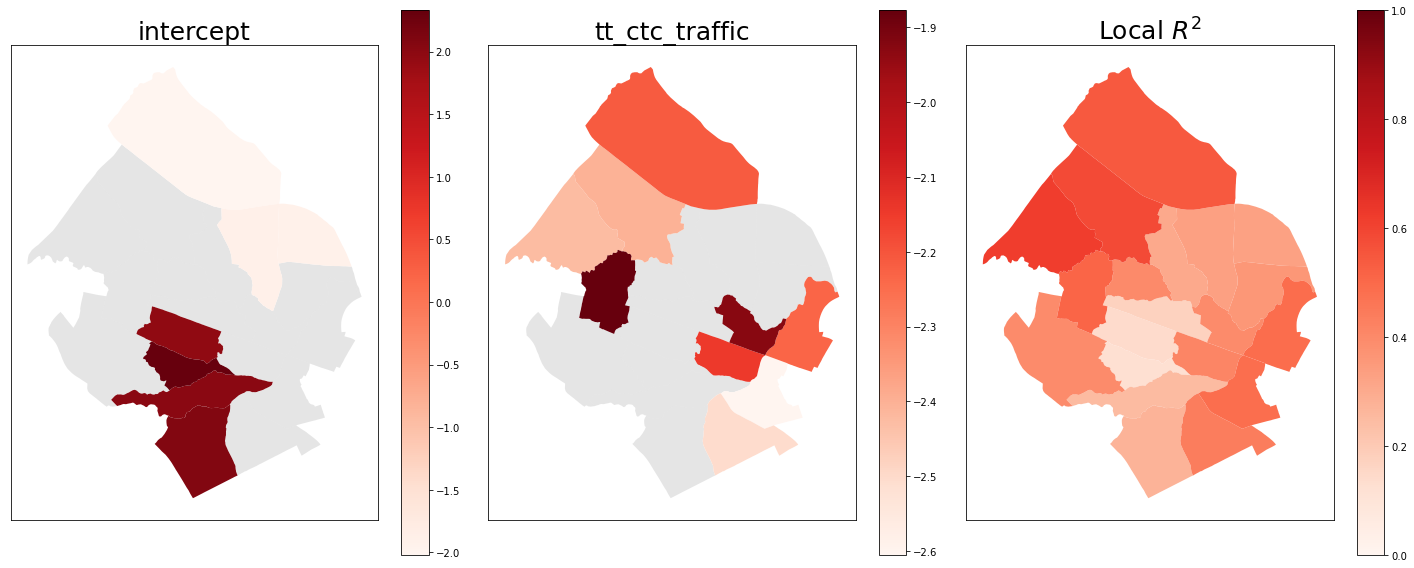

In [123]:
filtered = gwr_results.filter_tvals(alpha = 0.1)
plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots(1,3,figsize = (2*10,8), subplot_kw = {'aspect':'equal'})

ax = ax.flatten()
for i,row in enumerate(filtered.T):
    list_temp = model_data.assign(toplot = filtered.T[i])
    list_temp.query('toplot == 0').sort_values('toplot').plot(color = 'grey',
                                                              marker = '.',
                                                              ax = ax[i],
                                                              alpha = 0.2)
    list_temp.query('toplot!= 0').sort_values('toplot').plot(column = 'toplot', cmap = 'Reds',marker = '.',
                                                              ax = ax[i],
                                                              legend = True)
    ax[i].set_title(['intercept','tt_ctc_traffic'][i], fontsize = 25)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

model_data.assign(r2 = gwr_results.localR2).sort_values('r2').plot(column = 'r2',ax = ax[-1],marker = '.', cmap = 'Reds',
                                                           legend = True, vmin = 0 , vmax = 1)
ax[-1].set_xticklabels([])
ax[-1].set_yticklabels([])
ax[-1].set_xticks([])
ax[-1].set_yticks([])
ax[-1].set_title('Local $R^2$', fontsize = 25)

fig.tight_layout()
plt.show()

In [124]:
n_y = model_data['cases'].values.reshape(-1,1)
n_x =  mod2[['informality_percentage','pop_density_km']].values
n_x = (n_x - n_x.mean(axis = 0))/n_x.std(axis = 0)
n_y = (n_y - n_y.mean(axis = 0))/n_y.std(axis = 0)
coords = list(zip(model_data.centroid.x,model_data.centroid.y))
gwr_selector = Sel_BW(coords, n_y, n_x,constant=False, kernel = 'gaussian')
gwr_bw = gwr_selector.search(bw_min=3)
model = GWR(coords, n_y, n_x,gwr_bw, kernel = 'bisquare')
gwr_results = GWR(coords, n_y, n_x,gwr_bw).fit()
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                  20
Number of covariates:                                                     3

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             13.380
Log-likelihood:                                                     -24.359
AIC:                                                                 54.718
AICc:                                                                59.385
BIC:                                                                -37.547
R2:                                                                   0.331
Adj. R2:                                                              0.252

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


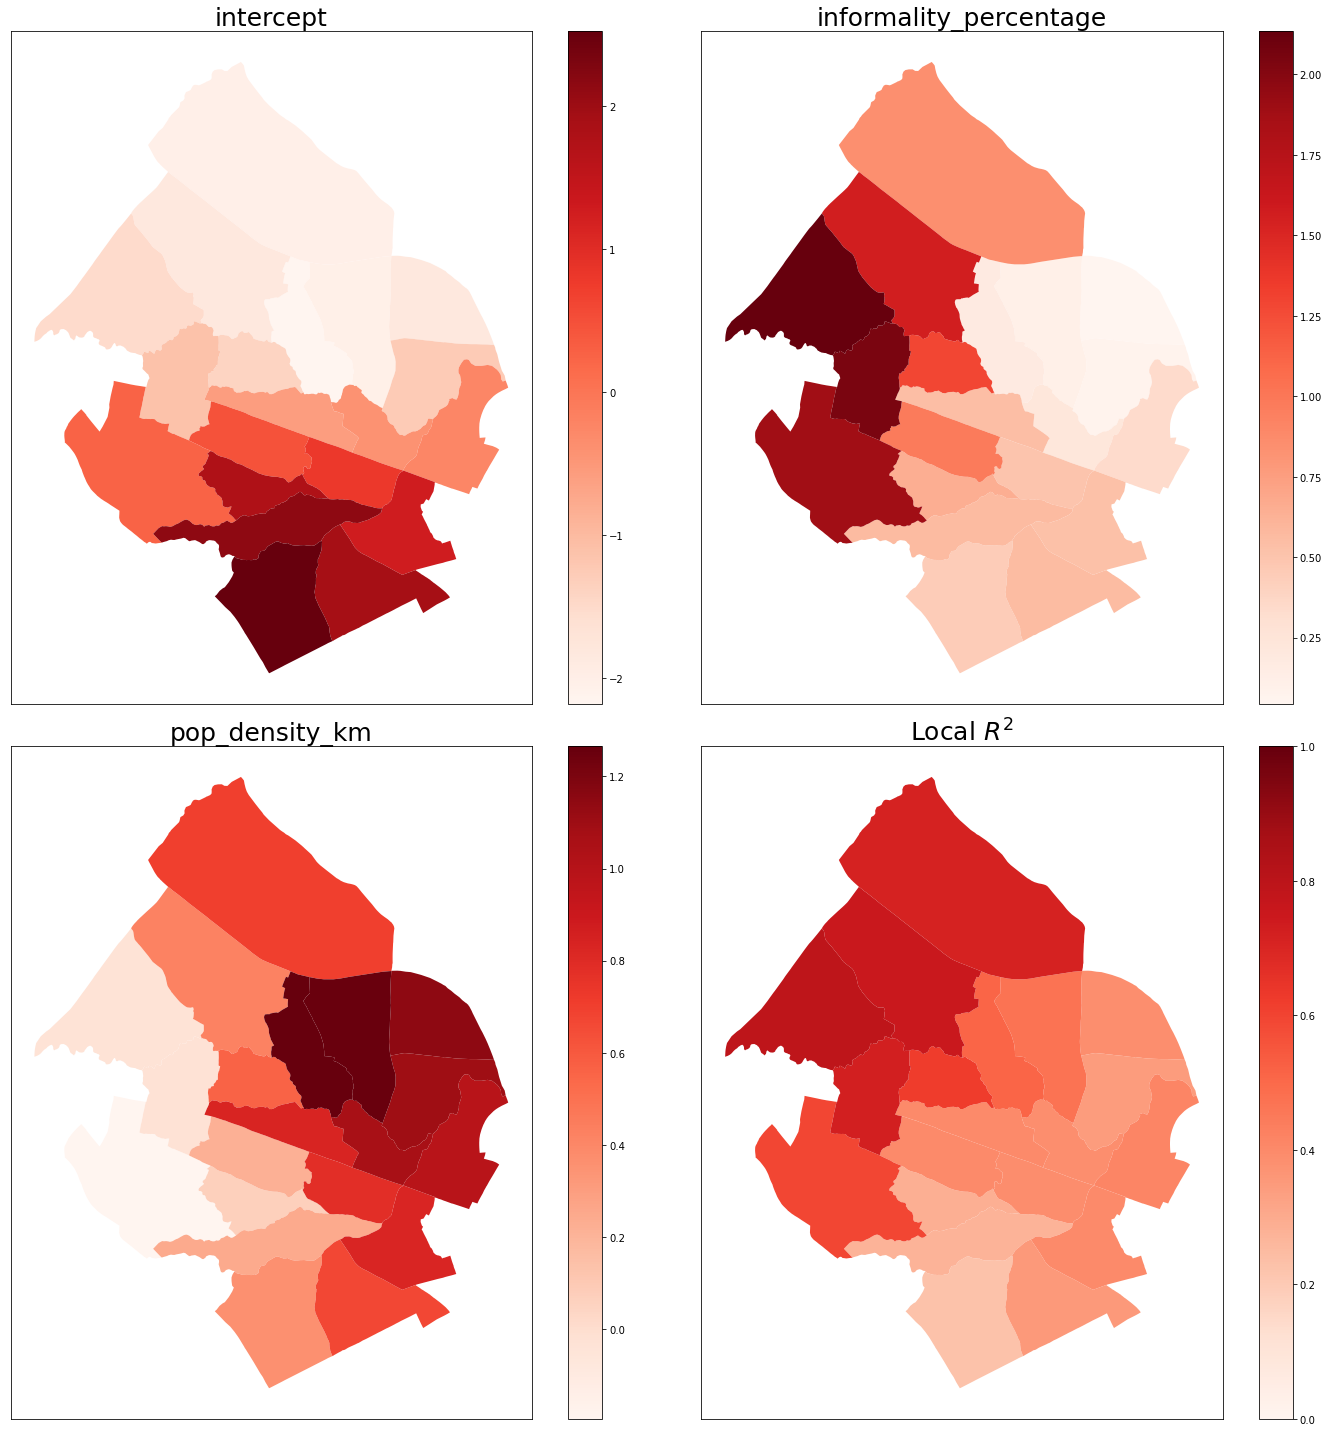

In [125]:
filtered = gwr_results.filter_tvals(alpha = 1)
plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots(2,2,figsize = (2*10,2*10), subplot_kw = {'aspect':'equal'})

ax = ax.flatten()
for i,row in enumerate(filtered.T):
    list_temp = model_data.assign(toplot = filtered.T[i])
    list_temp.query('toplot == 0').sort_values('toplot').plot(color = 'grey',
                                                              marker = '.',
                                                              ax = ax[i],
                                                              alpha = 0.2)
    list_temp.query('toplot!= 0').sort_values('toplot').plot(column = 'toplot', cmap = 'Reds',marker = '.',
                                                              ax = ax[i],
                                                              legend = True)
    ax[i].set_title(['intercept','informality_percentage','pop_density_km'][i], fontsize = 25)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

model_data.assign(r2 = gwr_results.localR2).sort_values('r2').plot(column = 'r2',ax = ax[-1],marker = '.', cmap = 'Reds',
                                                           legend = True, vmin = 0 , vmax = 1)
ax[-1].set_xticklabels([])
ax[-1].set_yticklabels([])
ax[-1].set_xticks([])
ax[-1].set_yticks([])
ax[-1].set_title('Local $R^2$', fontsize = 25)

fig.tight_layout()
plt.show()